In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
PATH = "/content/drive/MyDrive/GSDS/2022-1/MLDL1/ML/Homework2"
os.chdir(PATH)

RANDOM_STATE = 202224790
TEST_SIZE = 0.2

In [ ]:
os.getcwd()

'/content/drive/MyDrive/GSDS/2022-1/MLDL1/ML/Homework2'

In [ ]:
## basic modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Any
from collections.abc import Callable
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## for preprocessing, model selection, and evaluation
from sklearn.preprocessing import QuantileTransformer
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score, accuracy_score, classification_report

## for dimension reduction and feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector

## classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA,
                                          QuadraticDiscriminantAnalysis as QDA)
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [ ]:
X_train = pd.read_csv("./OnlineAd_X_train.csv", engine='python', header=None)
X_test = pd.read_csv("./OnlineAd_X_test.csv", engine='python', header=None)
Y = pd.read_csv("./OnlineAd_Y_train.csv", engine='python', header=None)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,0.9687,-0.3948,-0.5467,-0.1611,0.3003,-0.3423,-0.2714,-0.3337,0.4581,0.0075,-1.7761,-0.0290,-1.1594,0.5966,-0.2119,-0.9369,-0.9073,1.4489,-0.1384,0.8417,-0.1292,-0.7961,0.5370,0.7359,0.0093,-0.9216,-0.0155,-0.2297,0.9693,0.4487,0.9217,1.4749,0.0955,-0.7243,-0.3827,-0.5995,-0.2156,-0.3669,1.0441,-0.9571,-1.2408,0.1834,0.1665,0.3505,0.2606,-0.5047,-0.1957,0.3195,-0.0851,-0.5930,-0.7224,-0.1878,0.4109,0.1100,-0.2740,-0.1157,-0.9331,-0.0916,-0.8091,0.7897,-0.1256,-2.4636,-0.9902,-1.0018,0.5918,0.0210,-0.8880,0.6498,-0.1415,0.6087,1.5593,-0.0034,0.2217,-0.2994,0.0863,-2.4472,-0.8840,0.2811,1.1043,1.2924,-0.7389,-0.3612,1.0725,0.7564,-0.3931,-0.7289,-0.4720,-0.3423,-0.5289,0.5748,0.4367,-1.3889,0.3649,-0.4930,0.2080,-0.4367,-0.6449,-0.6987,0.2309,0.4809,-0.9802,-0.7361,0.4898,-0.9764,0.5390,-0.1290,0.3802,-0.0256,-0.3945,0.4551,0.4145,-0.4420,0.3629,-0.6770,0.9204,0.5902,-0.4845,1.4035,0.9429,-0.3683,0.3769,0.0764,0.4347,-1.0864,-0.0726,-0.1364,0.7491,0.1225,0.9187,-0.2360,1.3280,-0.3770,0.6909,0.3748,-0.3675,0.7716,-2.0457,0.3960,-0.6824,-0.7147,-0.0041,0.5793,-0.6676,-0.3748,-0.2857,-0.6024,0.4282,-0.1032,-0.2929,0.2147,-0.5236,0.5063,0.1956,0.7233,0.0142,0.5278,0.3182,-0.2501,-0.2417,0.2595,-0.0365,-0.7168,-0.2278,0.1468,-0.1106,-0.3554,0.1022,0.3282,-0.4194,-0.1337,-0.6492,-0.6347,-0.2790,-0.3790,0.8053,-0.1080,0.1551,1.1846,0.5943,0.1740,0.2558,-0.1889,-0.4052,2.0991,0.1877,0.2858,0.2883,0.3679,0.7391,0.5586,-1.2493,-0.9964,0.3885,-0.2453,1.0410,0.5791,-0.3219,0.3634,0.0403,0.4947,0.7104,-0.1534,0.0713,0.0776,0.2087,0.0727,-0.0719,-0.1040,-0.1209,0.1340,0.8557,-1.0003,-0.4595,-0.8980,0.1422,0.3734,1.2034,0.0379,0.5058,0.2805,-0.5077,-0.5455,-0.9385,-0.2558,1.3380,0.1268,-0.7364,-1.3716,-0.0038,-0.8942,-0.2577,-0.8587,-1.2298,0.6989,-0.8773,-0.4767,-0.8871,-0.0890,-0.2281,1.2456,0.5295,-1.6922,0.1422,0.9220,-0.0883,0.7012,0.6710,-0.3856,0.5162,-0.3330,0.0466
1,-0.4669,0.5222,0.6956,-0.6545,0.4683,-1.3767,-0.8648,-0.1455,1.0665,-0.3412,-1.6315,-0.2805,-0.8755,0.0336,0.4040,0.1373,0.2402,0.1551,1.0632,0.8298,-1.0590,-0.4629,0.0058,-0.4648,-0.2297,0.1598,-1.0850,0.7600,-0.2573,-0.6418,0.3069,0.4701,0.4366,0.1226,-0.4044,-0.0836,-0.4411,1.0292,0.3762,-0.0448,-0.0254,-0.0760,0.8553,0.7972,1.9711,-1.0028,0.7172,0.0199,-0.4461,-0.2962,-0.8231,-0.4212,1.5894,-0.1033,0.3805,0.4120,0.3055,-0.3443,-1.4896,-0.0174,0.0746,-1.2985,0.4379,-1.1017,1.0825,-0.8141,-0.3810,-1.0006,-0.3232,0.3773,0.3562,0.8852,0.8596,-0.5180,0.5823,-2.3644,-0.8144,-0.7612,0.4187,0.5682,-0.6851,-0.3178,0.0230,-0.5563,0.5909,-0.4875,-0.1527,0.7204,-1.6178,-0.8620,1.0999,-0.9622,0.9670,-0.5605,-0.3804,0.0146,-1.1591,0.3410,-1.1809,-0.1687,0.8194,-0.4131,0.2448,-0.6601,0.5466,-0.1509,-0.3922,0.3017,-0.3840,0.1373,-0.4513,-0.4172,0.4279,-1.1269,-0.0167,1.1935,-1.1240,1.0765,1.0090,1.0863,0.5462,0.0408,1.0297,0.0681,-0.3510,-1.2606,1.6679,-0.1897,-0.0027,-0.3717,0.2044,0.3008,0.6767,0.2767,0.9884,-0.6175,0.1160,1.2465,0.0519,0.0650,-0.7635,0.3085,0.7614,0.2414,-0.3704,0.3453,0.9506,-0.9587,-0.8139,1.1421,-0.6579,-0.9919,0.5381,-0.0931,0.0929,-0.7025,-0.0788,-0.2186,0.1234,0.2681,0.9047,-0.58

In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,-0.0945,-0.0500,-0.4784,-0.5463,-0.7548,-0.8726,-0.3604,0.1178,-0.5160,-0.1509,0.6015,-0.3176,-0.3909,-0.2429,-0.3710,-0.0200,0.2399,-0.2628,-0.2099,-0.2095,-0.2958,0.0840,-0.2692,0.0554,-0.1876,0.0789,-0.6122,-0.5628,0.0809,0.2427,0.5233,-0.3155,0.0265,-0.1034,0.3204,-0.2504,-0.2937,-0.3147,-0.3581,-0.4221,-0.7006,-0.3918,0.5600,0.0240,-0.3793,-0.3679,-0.2014,0.2179,-0.0717,-0.1912,-0.6837,-0.7168,-0.0476,-0.6434,0.4680,0.1907,-0.5932,-0.4527,-0.2949,-0.3271,-0.7782,-0.4813,-0.2382,-0.1559,-0.0616,-0.5998,-0.0167,0.0200,0.3265,-0.0529,-0.8019,0.4579,0.1177,0.2637,-0.0276,-0.0359,-0.1758,-0.0526,-0.8564,-0.8916,-0.3106,-0.6192,-0.2655,-0.2691,-0.7370,-0.1912,-0.2642,-0.4062,-0.3405,-0.1251,-0.3137,-0.6084,0.2512,-0.1080,-0.0943,0.5172,-0.4461,-0.9979,0.2843,0.1044,-0.0875,-0.9584,-0.5784,-0.5051,0.3828,0.4039,0.7101,0.1871,0.3524,-0.2887,0.3679,-0.1833,-0.0841,-0.5700,-0.2220,-0.6990,0.1850,-0.5595,-0.3291,-0.5849,0.3816,0.4279,0.0483,-0.8439,-0.0105,-0.3032,-0.7286,-0.6519,0.5910,-0.7318,0.0231,0.1469,-0.7598,-0.1154,-0.2112,-0.3493,-0.1448,-0.5865,-0.4494,-0.9169,-0.5700,-0.0374,-0.6320,0.3496,0.0063,0.3381,-0.4170,-0.9715,-0.3092,-0.4636,-0.7041,0.2037,-0.2470,-0.1509,0.4201,-0.2625,0.5123,-0.2718,-0.4986,-0.0493,-0.2953,-0.8594,-0.5612,0.4359,-0.1216,-0.8988,-0.2387,-0.4559,-0.6388,-0.1051,-0.6178,-0.6445,0.0236,-0.2188,0.7934,0.1757,0.2981,-0.3799,-0.1955,-0.4547,-0.2191,-0.7249,-0.2976,-0.1038,0.4962,-0.4071,-0.0057,0.5111,-0.1844,0.1469,-0.1083,-0.2778,-0.3766,-0.1682,-0.6450,-0.0987,-0.4150,-0.5526,0.0212,-0.0502,-0.5939,0.2714,-0.0124,-0.6383,-0.3683,-0.1494,-0.7906,-0.2270,-0.3192,-0.2304,-0.3375,-0.1225,0.2660,-0.0706,0.2053,-0.0042,-0.5305,0.2295,-0.1964,0.2010,-0.0640,-0.1457,-0.8044,-0.1912,-0.8909,-0.5238,-0.1574,-0.7181,0.0679,-0.5304,-0.4465,0.1727,-0.2202,-0.4127,-0.1575,-0.5867,-0.8360,-0.2186,-0.6313,0.4101,-0.3675,-0.1953,-0.2087,-0.3341,-0.5436,-0.6590,-0.7065,-0.9930,-0.5995,-0.0293,0.0155
1,-0.0378,-0.0272,0.0014,0.0412,0.0229,-0.0204,0.0173,0.0598,0.0036,-0.0193,-0.0089,-0.0511,0.0274,-0.0198,-0.0058,0.0460,0.0188,-0.0320,0.0361,0.0021,0.0112,0.0103,0.0148,0.0004,0.0053,-0.0075,0.0017,-0.0369,0.0015,-0.0323,0.0107,-0.0128,0.0607,0.0730,-0.0574,0.0219,-0.0056,-0.0320,-0.0062,0.0031,-0.0039,0.0126,0.0169,-0.0027,-0.0246,0.0314,-0.0155,0.0404,0.0114,-0.0212,0.0474,0.0540,0.0263,0.0101,-0.0146,0.0428,0.0003,-0.0532,0.0028,0.0016,0.0042,0.0062,0.0368,-0.0143,0.0059,-0.0781,-0.0071,-0.0343,0.0574,-0.0028,0.0128,-0.0167,0.0456,0.0024,-0.0241,-0.0023,0.0209,-0.0021,0.0191,0.0307,-0.0034,0.0442,0.0203,-0.0304,0.0064,0.0083,-0.0337,-0.0026,-0.0218,-0.0587,-0.0785,-0.0569,0.0314,0.0132,0.0087,0.0297,0.0185,-0.0064,0.0385,0.0577,-0.0434,0.0356,0.0089,0.0104,-0.0184,-0.0284,-0.0056,-0.0035,-0.0571,-0.0118,0.0160,0.0431,-0.0100,0.0656,0.0301,0.0515,0.0026,0.0301,0.0215,-0.0131,0.0464,-0.0082,-0.0462,-0.0049,-0.0009,-0.0174,0.0288,0.0135,-0.0021,-0.0092,0.0227,0.0345,0.0088,-0.0346,-0.0035,0.0072,-0.0026,0.0625,-0.0118,0.0590,0.0369,0.0136,0.0040,0.0051,-0.0061,0.0340,-0.0474,-0.0024,0.0559,-0.0607,0.0374,-0.0286,0.0366,0.0198,0.0725,0.0

In [ ]:
Y.head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


# EDA and Preprocessing

In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,-0.269356,-0.074011,-0.114989,-0.063642,0.016634,-0.453563,-0.088428,-0.011040,0.0

In [ ]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.215316,-0.057480,-0.095965,-0.031436,0.026203,-0.418653,-0.088072,0.028751,0.115950,-0.103560,-0.528504,0.064740,-0.006065,0.205174,0.056580,-0.315685,0.035725,0.420405,0.170525,0.166660,0.207334,-0.325100,0.213199,-0.050592,-0.121962,-0.129163,-0.107422,0.243457,0.357929,0.245327,0.235855,0.335073,-0.077114,-0.090822,-0.272128,-

## Check out histogram

In [ ]:
width = 10
height = 5

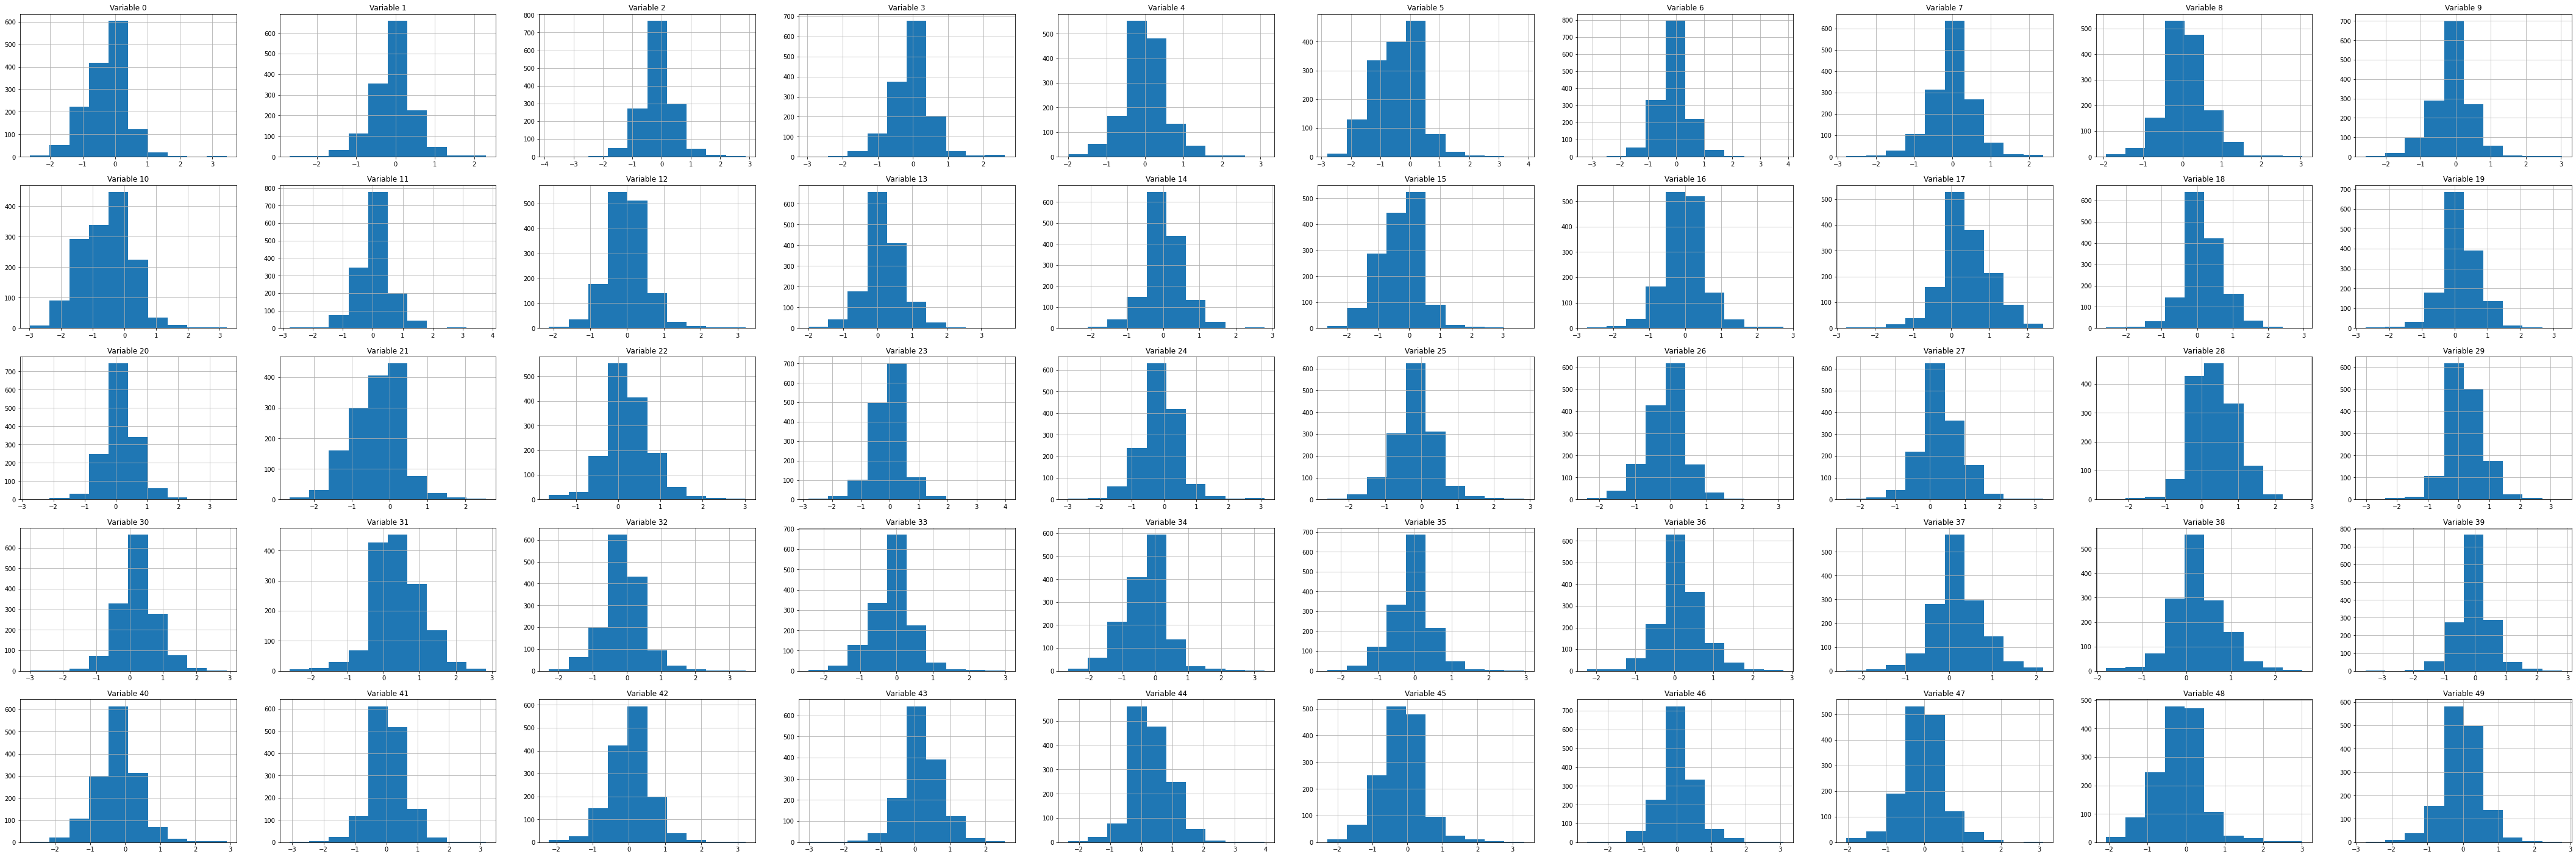

In [ ]:
fig, ax = plt.subplots(height, width, figsize=(75, 25))

idx = 0
for i in range(height):
    for j in range(width):
        idx = (i * width) + j
        ax[i][j].hist(X_train[idx], bins=10)
        ax[i][j].grid(True)
        ax[i][j].set_title(f"Variable {idx}")
plt.show()

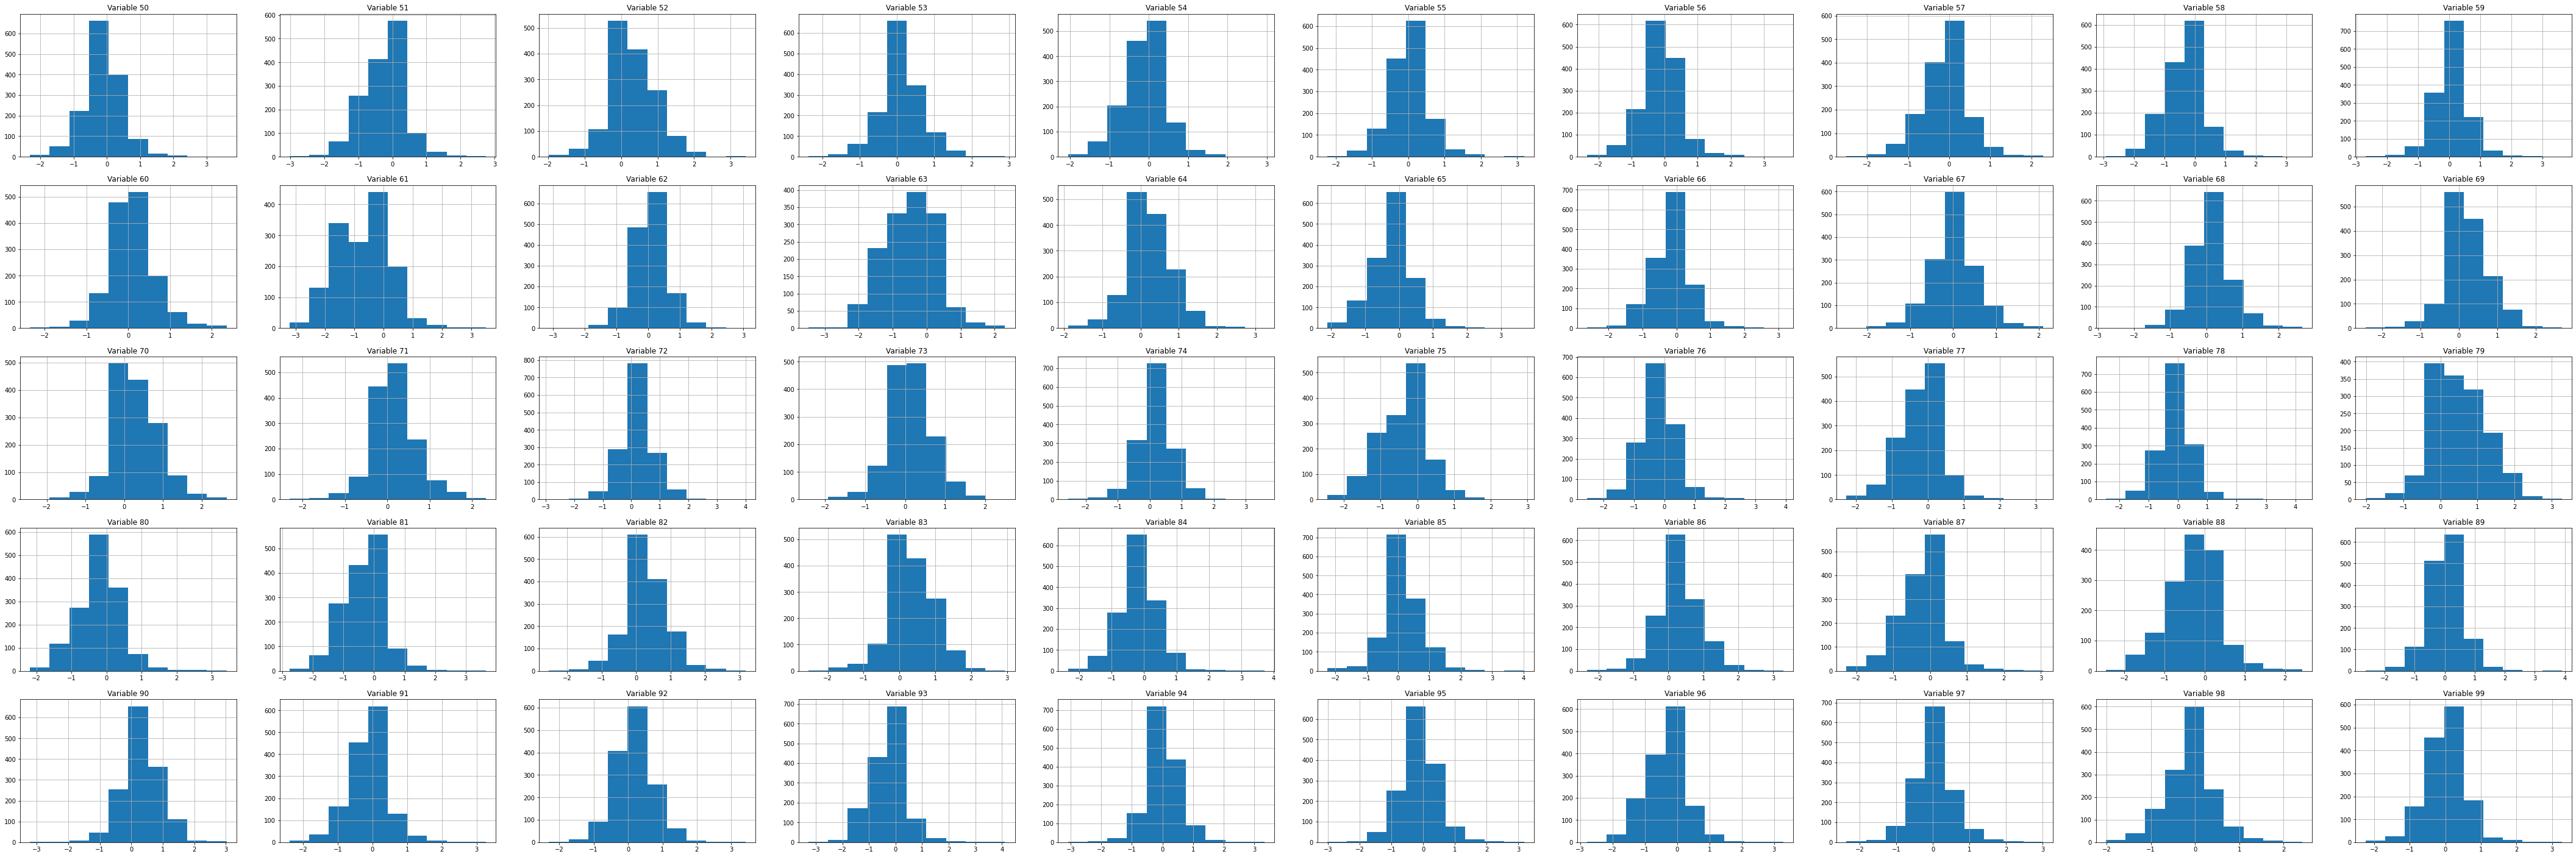

In [ ]:
fig, ax = plt.subplots(height, width, figsize=(75, 25))

for i in range(height):
    for j in range(width):
        idx += 1
        ax[i][j].hist(X_train[idx], bins=10)
        ax[i][j].grid(True)
        ax[i][j].set_title(f"Variable {idx}")
plt.show()

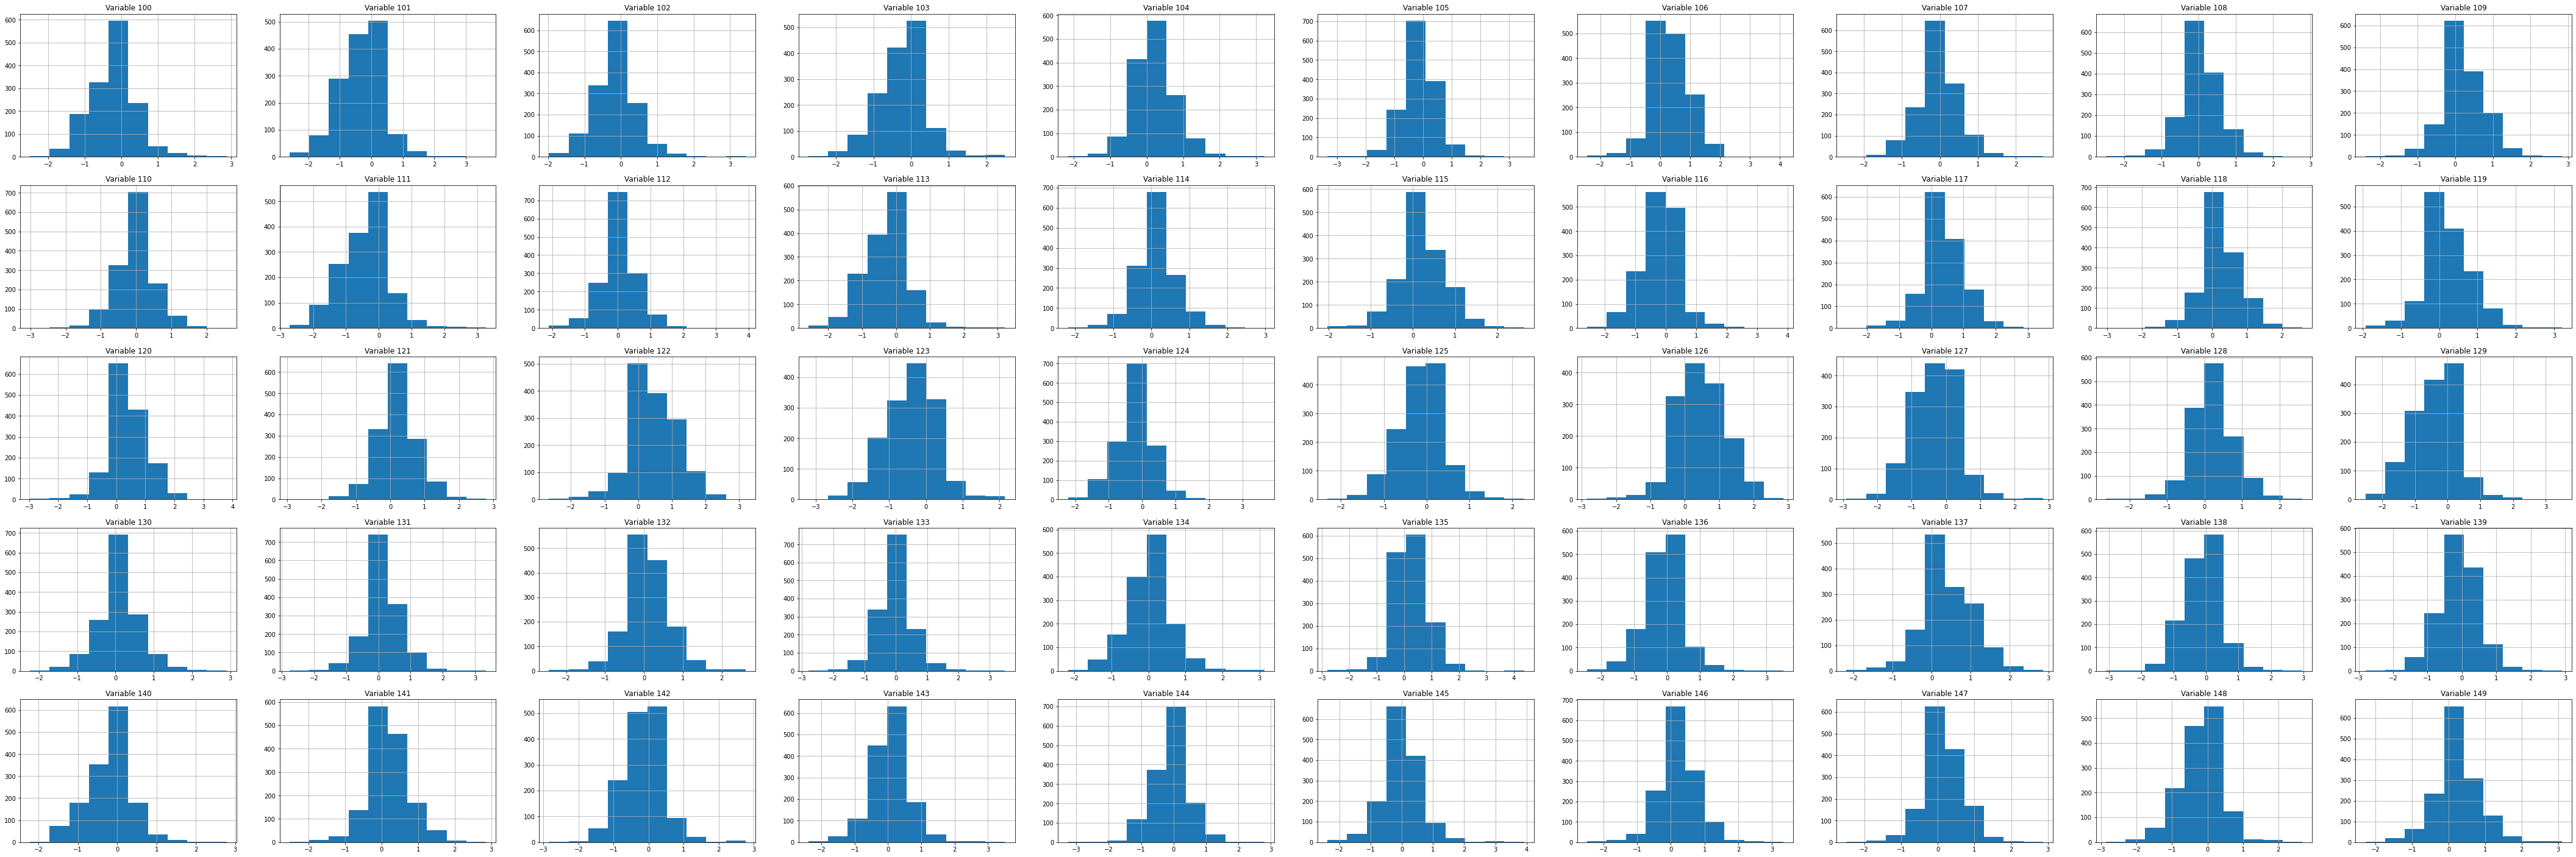

In [ ]:
fig, ax = plt.subplots(height, width, figsize=(75, 25))

for i in range(height):
    for j in range(width):
        idx += 1
        ax[i][j].hist(X_train[idx], bins=10)
        ax[i][j].grid(True)
        ax[i][j].set_title(f"Variable {idx}")
plt.show()

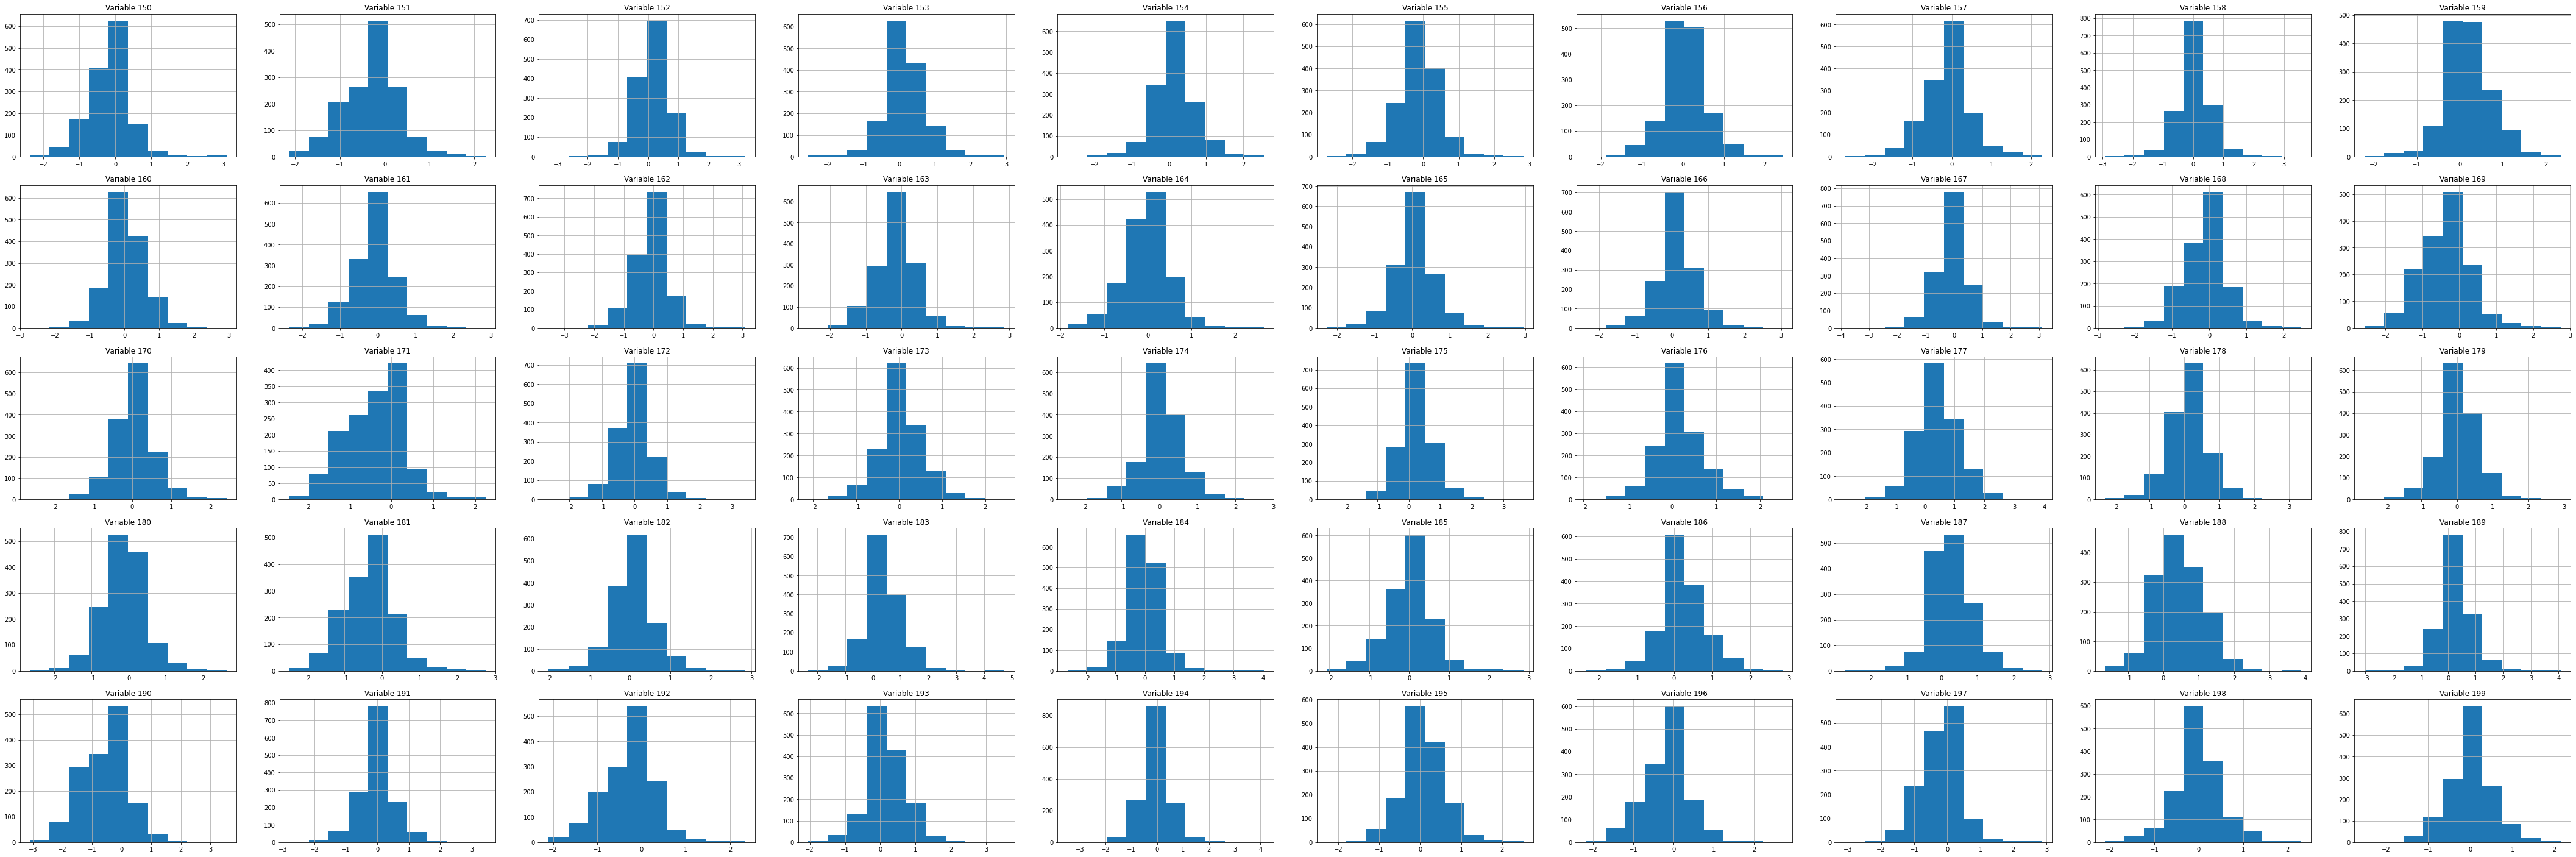

In [ ]:
fig, ax = plt.subplots(height, width, figsize=(75, 25))

for i in range(height):
    for j in range(width):
        idx += 1
        ax[i][j].hist(X_train[idx], bins=10)
        ax[i][j].grid(True)
        ax[i][j].set_title(f"Variable {idx}")
plt.show()

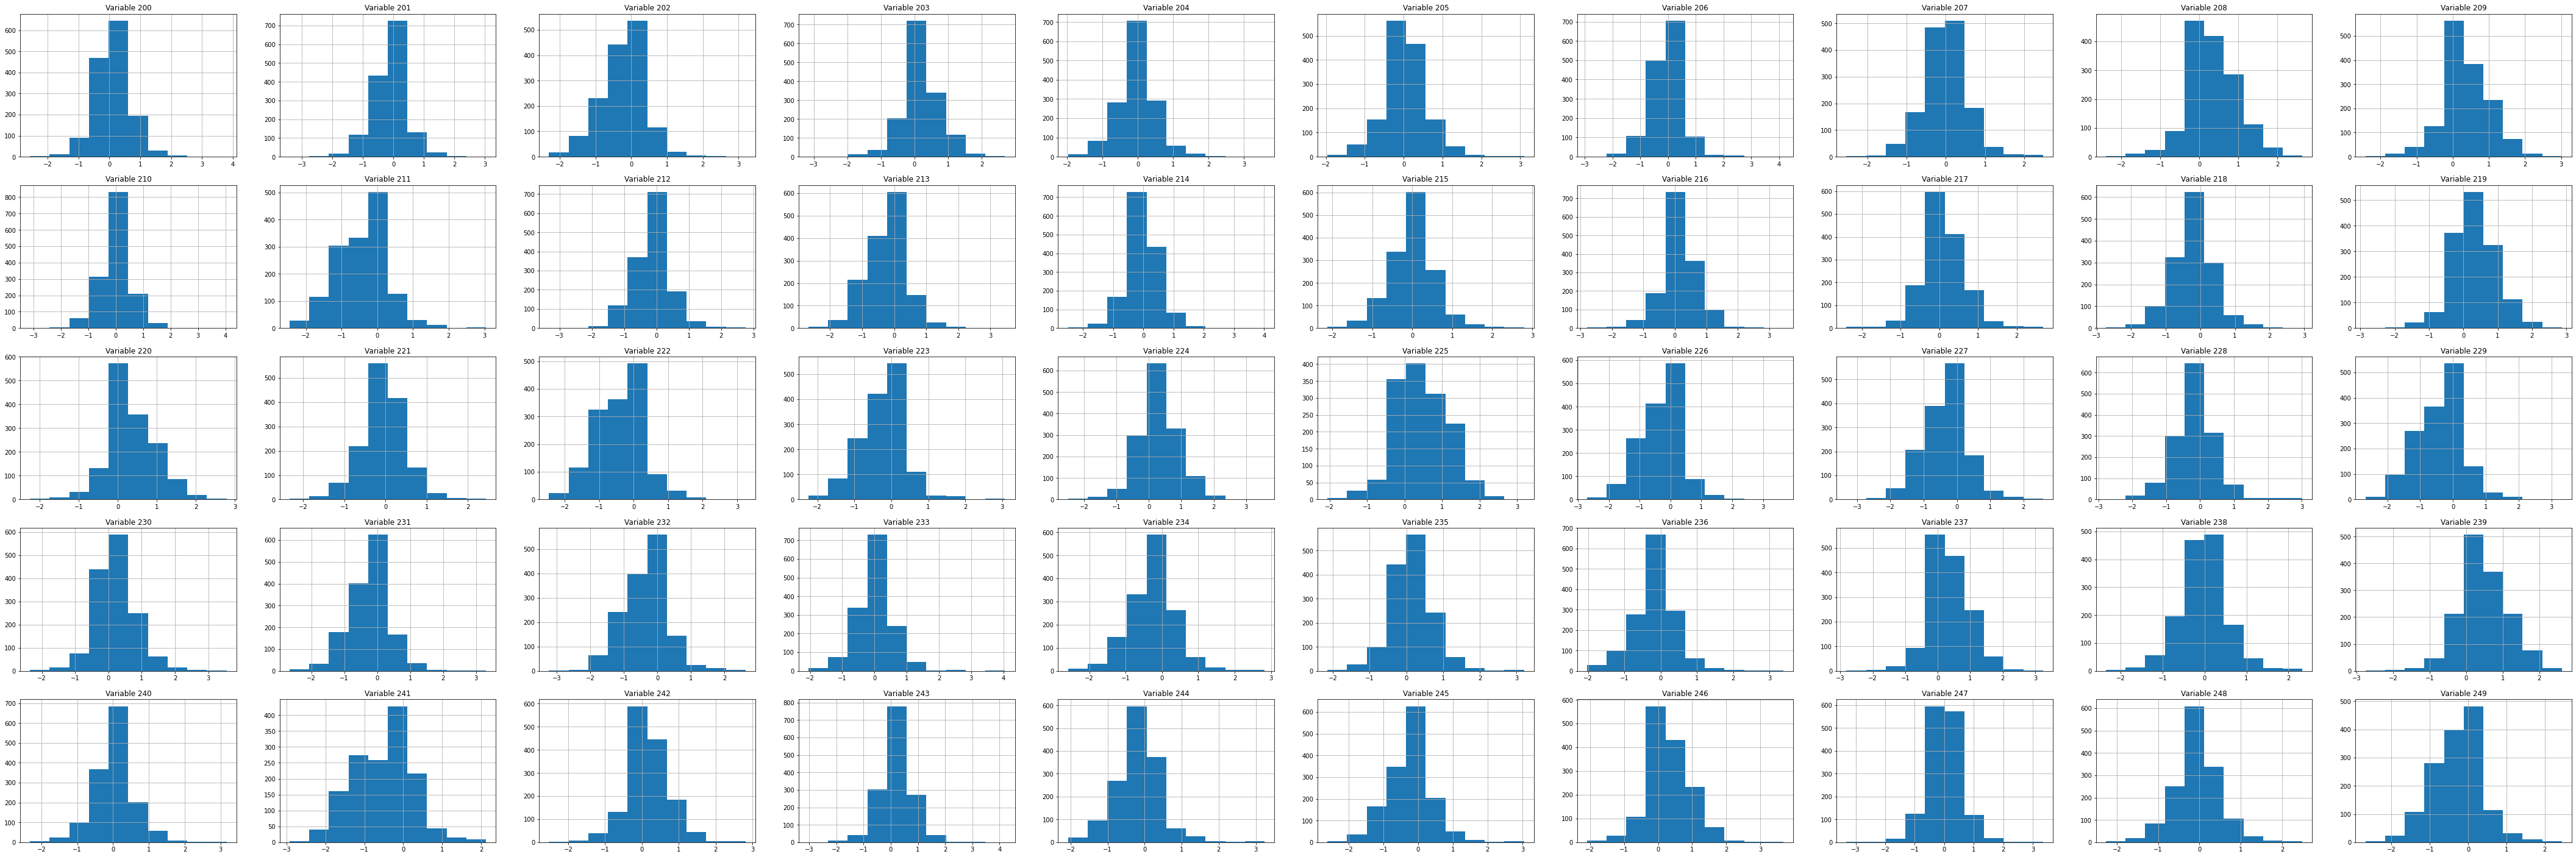

In [ ]:
fig, ax = plt.subplots(height, width, figsize=(75, 25))

for i in range(height):
    for j in range(width):
        idx += 1
        ax[i][j].hist(X_train[idx], bins=10)
        ax[i][j].grid(True)
        ax[i][j].set_title(f"Variable {idx}")
plt.show()

* From the histograms, it seems that the distribution of every variable - at least almost - follows the bell-shaped distribution. Thus I think that no more transformation is necessary here.

In [ ]:
## After standardization
copied = X_train.copy()
copied[:] = (copied[:] - copied[:].mean()) / (copied[:].std())
copied.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
count,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452

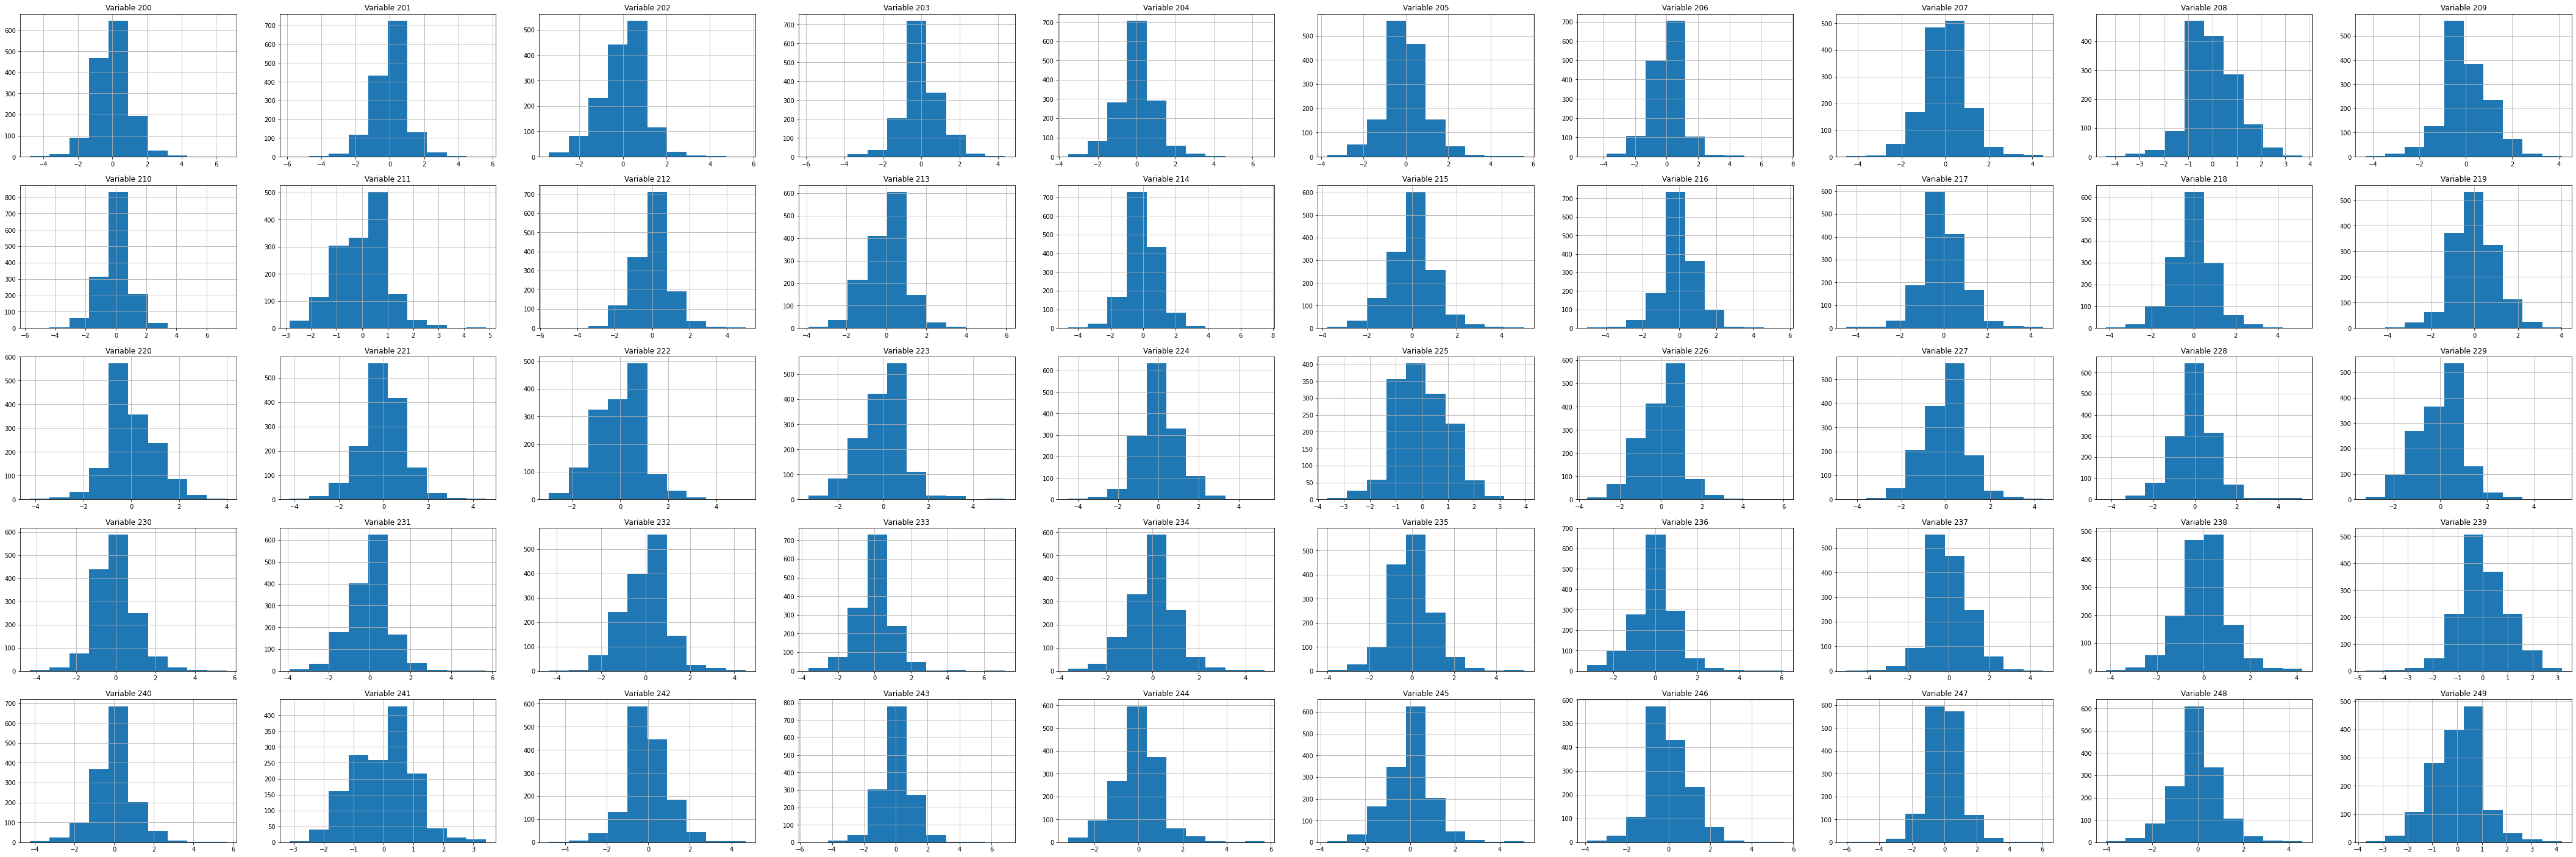

In [ ]:
fig, ax = plt.subplots(height, width, figsize=(75, 25))

idx = 199
for i in range(height):
    for j in range(width):
        idx += 1
        ax[i][j].hist(copied[idx], bins=10)
        ax[i][j].grid(True)
        ax[i][j].set_title(f"Variable {idx}")
plt.show()

* Since Standardization is a linear transformation, it does not change shape of the distribution. Though the features are not standardized yet, I'll implement the standardization to fix the mean and standard deviation of each variable to 0 and 1, respectively.

## Standardization

In [ ]:
X_train[:] = (X_train[:] - X_train[:].mean()) / X_train[:].std()
X_test[:] = (X_test[:] - X_test[:].mean()) / X_test[:].std()

In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
count,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452

In [ ]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000

## Aggregate target variables

* The target variable $Y$ consists of three dummy columns. However, since shape of the target variable should be a 1D array or a vector, it's necessary to consolidate those three columns.
* Therefore, I'll map each column to one of $\left\{0, 1, 2\right\}$, where 0 denotes the group of users who have not clicked any ads, 1 denotes the group that have clicked the ad $\texttt{A}$, and 2 denotes those who have clicked the ad $\texttt{B}$.

In [ ]:
def map0(x):
    if x == 1: return 0
    else: return 0


def map1(x):
    if x == 1: return 1
    else: return 0


def map2(x):
    if x == 1: return 2
    else: return 0

In [ ]:
Y[0] = Y[0].map(map0)
Y[1] = Y[1].map(map1)
Y[2] = Y[2].map(map2)

Y.head()

,0,1,2
0,0,0,0
1,0,0,2
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
Y.iloc[1].sum(axis=0)

2

In [ ]:
y_train = pd.Series(index=Y.index, dtype=np.uint8)
for i in range(Y.shape[0]):
    y_train[i] = int(Y.iloc[i].sum(axis=0))
print(y_train.shape)

y_train.head(10)

(1452,)


0    0
1    2
2    0
3    0
4    0
5    1
6    0
7    2
8    0
9    2
dtype: uint8

## Distribution of the target

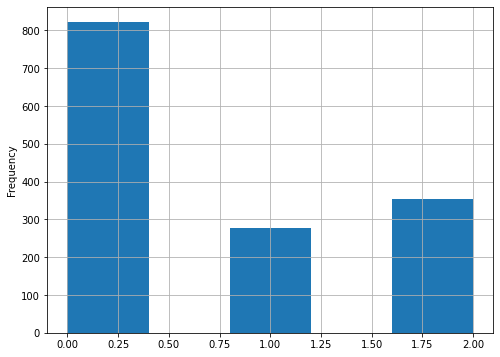

In [ ]:
y_train.plot(kind='hist', grid=True, bins=5, figsize=(8, 6))
plt.show()

In [ ]:
y_train.value_counts()

0    822
2    353
1    277
dtype: int64

* The distribution of the target is imbalanced, with more zeros than the non-zeros combined together. This implies that the stratified sampling is required for better performance. 

# Baseline

* Here, I'll train models without any feature engineering, selection, or regularization.

* The purposes of this section are:
    - to select the "best-model candidates" under the criterion of cross-validation score,
    - to implement experiment on multi-class classification training methods: `default`, `one-versus-one`, and `one-versus-all`,
    - and to implement experiment on validation methods: cross-validation and hold-out validation.

## Model definition

In [ ]:
lr = LogisticRegression(penalty='none', random_state=RANDOM_STATE)
knn = KNeighborsClassifier()
lda = LDA()
qda = QDA()
linsvc = LinearSVC(random_state=RANDOM_STATE)
rbfsvm = SVC(kernel='rbf', random_state=RANDOM_STATE)
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
bag = BaggingClassifier(random_state=RANDOM_STATE)
rf = RandomForestClassifier(random_state=RANDOM_STATE)
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)

In [ ]:
models = [lr, knn, lda, qda, linsvc, rbfsvm, dt, bag, rf, gbc]

In [ ]:
scores = dict() ## dict for scoredfs

## OVO training

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, shuffle=True,
                                            stratify=y_train, random_state=RANDOM_STATE)

### Hold-out Validation

In [ ]:
print(f"OVO, Hold-out")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for m in models:
    ## using ovo function
    estimator_ovo = OneVsOneClassifier(m).fit(X_tr, y_tr)
    y_pred_ovo = estimator_ovo.predict(X_val)
    accuracy_ovo = accuracy_score(y_val, y_pred_ovo)
    result = classification_report(y_val, y_pred_ovo).split('\n')[-2]
    f1 = float(result.split(' ')[-8])

    ## not using ovo function - to get the roc_auc_score
    estimator = m.fit(X_tr, y_tr)
    try:
        y_pred_proba = estimator.predict_proba(X_val)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovo')
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy_ovo:.5f}\tROC-AUC:{roc_auc:.5f}\tF1:{f1}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': accuracy_ovo, 'roc-auc': roc_auc, 'f1': f1}, ignore_index=True)
    except:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy_ovo:.5f}\tF1:{f1}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': accuracy_ovo, 'roc-auc': 0, 'f1': f1}, ignore_index=True)

scores['OVO_h'] = score_df

OVO, Hold-out
	Model: LogisticRegression                      	Accuracy: 0.53265	ROC-AUC:0.67228	F1:0.54
	Model: KNeighborsClassifier                    	Accuracy: 0.57732	ROC-AUC:0.64152	F1:0.58
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.59107	ROC-AUC:0.70293	F1:0.58
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.55326	ROC-AUC:0.52868	F1:0.47
	Model: LinearSVC                               	Accuracy: 0.53265	F1:0.54
	Model: SVC                                     	Accuracy: 0.63574	F1:0.55
	Model: DecisionTreeClassifier                  	Accuracy: 0.53608	ROC-AUC:0.59146	F1:0.53
	Model: BaggingClassifier                       	Accuracy: 0.64605	ROC-AUC:0.70932	F1:0.61
	Model: RandomForestClassifier                  	Accuracy: 0.63918	ROC-AUC:0.72318	F1:0.57
	Model: GradientBoostingClassifier              	Accuracy: 0.62887	ROC-AUC:0.71502	F1:0.59


In [ ]:
scores['OVO_h']

,model,acc,roc-auc,f1
0,LogisticRegression,0.532646,0.672275,0.54
1,KNeighborsClassifier,0.577320,0.641521,0.58
2,LinearDiscriminantAnalysis,0.591065,0.702931,0.58
3,QuadraticDiscriminantAnalysis,0.553265,0.528684,0.47
4,LinearSVC,0.532646,0.000000,0.54
5,SVC,0.635739,0.000000,0.55
6,DecisionTreeClassifier,0.536082,0.591464,0.53
7,BaggingClassifier,0.646048,0.709319,0.61
8,RandomForestClassifier,0.639175,0.723181,0.57
9,GradientBoostingClassifier,0.628866,0.715016,0.59


### Cross-validation

In [ ]:
print(f"OVO, CV")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for m in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    accs = []
    rocs = []
    f1s = []
    roc = True
    for train_idx, val_idx in kfold.split(X_train, y_train):
        X_tr_cv, X_val_cv = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        y_tr_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        ##
        estimator_ovo = OneVsOneClassifier(m).fit(X_tr_cv, y_tr_cv)
        y_pred_ovo_cv = estimator_ovo.predict(X_val_cv)
        accuracy_ovo_cv = accuracy_score(y_val_cv, y_pred_ovo_cv)
        accs.append(accuracy_ovo_cv)
        result = classification_report(y_val_cv, y_pred_ovo_cv).split('\n')[-2]
        f1 = float(result.split(' ')[-8])
        f1s.append(f1)

        ##
        estimator = m.fit(X_tr_cv, y_tr_cv)
        try:
            y_pred_proba_cv = estimator.predict_proba(X_val_cv)
            roc_auc_cv = roc_auc_score(y_val_cv, y_pred_proba_cv, multi_class='ovo')
            rocs.append(roc_auc_cv)
        except:
            roc = False

    if roc:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tROC-AUC:{np.mean(rocs):.5f}\tf1:{np.mean(f1s)}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': np.mean(rocs), 'f1': np.mean(f1s)}, ignore_index=True)
    else:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tf1:{np.mean(f1s)}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': 0, 'f1': np.mean(f1s)}, ignore_index=True)

scores['OVO_c'] = score_df

OVO, CV
	Model: LogisticRegression                      	Accuracy: 0.51925	ROC-AUC:0.63842	f1:0.526
	Model: KNeighborsClassifier                    	Accuracy: 0.51718	ROC-AUC:0.63565	f1:0.53
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.54337	ROC-AUC:0.66938	f1:0.538
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.55508	ROC-AUC:0.52659	f1:0.46799999999999997
	Model: LinearSVC                               	Accuracy: 0.52062	f1:0.528
	Model: SVC                                     	Accuracy: 0.64324	f1:0.5820000000000001
	Model: DecisionTreeClassifier                  	Accuracy: 0.53168	ROC-AUC:0.59885	f1:0.534
	Model: BaggingClassifier                       	Accuracy: 0.61569	ROC-AUC:0.66834	f1:0.574
	Model: RandomForestClassifier                  	Accuracy: 0.64254	ROC-AUC:0.70788	f1:0.5900000000000001
	Model: GradientBoostingClassifier              	Accuracy: 0.62875	ROC-AUC:0.71478	f1:0.586


## OVR training

### Hold-out Validation

In [ ]:
print(f"OVR, Hold-out")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for m in models:
    estimator = OneVsRestClassifier(m).fit(X_tr, y_tr)
    y_pred = estimator.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    result = classification_report(y_val, y_pred).split('\n')[-2]
    f1 = float(result.split(' ')[-8])
    try:
        y_pred_proba = estimator.predict_proba(X_val)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}\tROC-AUC: {roc_auc:.5f}\tF1:{f1}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': accuracy, 'roc-auc': roc_auc, 'f1': f1}, ignore_index=True)
    except:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}\tF1:{f1}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': accuracy, 'roc-auc': 0, 'f1': f1}, ignore_index=True)

scores['OVR_h'] = score_df

OVR, Hold-out
	Model: LogisticRegression                      	Accuracy: 0.54639	ROC-AUC: 0.68346	F1:0.55
	Model: KNeighborsClassifier                    	Accuracy: 0.48454	ROC-AUC: 0.64733	F1:0.5
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.58763	ROC-AUC: 0.70916	F1:0.56
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.55670	ROC-AUC: 0.54551	F1:0.47
	Model: LinearSVC                               	Accuracy: 0.54296	F1:0.54
	Model: SVC                                     	Accuracy: 0.64948	F1:0.57
	Model: DecisionTreeClassifier                  	Accuracy: 0.45361	F1:0.46
	Model: BaggingClassifier                       	Accuracy: 0.61512	ROC-AUC: 0.69539	F1:0.58
	Model: RandomForestClassifier                  	Accuracy: 0.63918	ROC-AUC: 0.73547	F1:0.59
	Model: GradientBoostingClassifier              	Accuracy: 0.65636	ROC-AUC: 0.73271	F1:0.61


### Cross-validation

In [ ]:
print(f"OVR, CV")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for m in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    accs = []
    rocs = []
    f1s = []
    roc = True
    for train_idx, val_idx in kfold.split(X_train, y_train):
        X_tr_cv, X_val_cv = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        y_tr_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
        estimator = OneVsRestClassifier(m).fit(X_tr_cv, y_tr_cv)
        y_pred = estimator.predict(X_val_cv)
        accuracy = accuracy_score(y_val_cv, y_pred)
        accs.append(accuracy)
        result = classification_report(y_val_cv, y_pred).split('\n')[-2]
        f1 = float(result.split(' ')[-8])
        f1s.append(f1)
        try:
            y_pred_proba = estimator.predict_proba(X_val_cv)
            roc_auc = roc_auc_score(y_val_cv, y_pred_proba, multi_class='ovr')
            rocs.append(roc_auc)
        except:
            roc = False
    
    if roc:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tROC-AUC: {np.mean(rocs):.5f}\tF1: {np.mean(f1s)}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': np.mean(rocs), 'f1': np.mean(f1s)}, ignore_index=True)
    else:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tF1: {np.mean(f1s)}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': 0, 'f1': np.mean(f1s)}, ignore_index=True)

scores['OVR_c'] = score_df

OVR, CV
	Model: LogisticRegression                      	Accuracy: 0.53094	ROC-AUC: 0.65617	F1: 0.522
	Model: KNeighborsClassifier                    	Accuracy: 0.46966	ROC-AUC: 0.63883	F1: 0.48200000000000004
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.55646	ROC-AUC: 0.67819	F1: 0.534
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.54751	ROC-AUC: 0.53977	F1: 0.4699999999999999
	Model: LinearSVC                               	Accuracy: 0.51717	F1: 0.508
	Model: SVC                                     	Accuracy: 0.64117	F1: 0.5660000000000001
	Model: DecisionTreeClassifier                  	Accuracy: 0.45382	F1: 0.466
	Model: BaggingClassifier                       	Accuracy: 0.61638	ROC-AUC: 0.69547	F1: 0.584
	Model: RandomForestClassifier                  	Accuracy: 0.63426	ROC-AUC: 0.72356	F1: 0.582
	Model: GradientBoostingClassifier              	Accuracy: 0.63152	ROC-AUC: 0.73821	F1: 0.586


* From this baseline result, I got:
    - For both cases and overall models, CV score was lower than the corresponding holdout validation score.
        - Note that this could be just a coincidence
    - In terms of performance measured by the accuracy and the roc-auc, the best-model candidates are:
        - LDA
        - RBF SVM
        - Tree-based Bagging Classifieir
        - Random Forest Classifier
        - Gradient Boosting Classifier
    - However, it's hard to tell if the OVO is better or the OVR is better, since some models, including the bagging classifier, scored higher in OVO method, while others scored higher in OVR method.

* Also, here I used the accuracy and the roc-auc score as metrics. Interesting thing is that the roc-auc score of the LDA, and the accuracy of SVM was high. This seems to imply that the given dataset is (linearly) well-separable, and that the variance within each class is not that different to the others.

## Dimension-reduction and feature selection

* For dimension-reduction and feature selection, we can think of three different methods:
    - PCA
    - Stepwise selection
    - LASSO

### PCA

In [ ]:
components = min(X_train.shape[0], X_train.shape[1])
pca_df = pd.DataFrame(index=[i for i in range(components)])
for c in range(1, components+1):
    pca = PCA(n_components=c)
    pca.fit(X_train)
    ratio = pca.explained_variance_ratio_
    pca_df[c] = np.concatenate((ratio, ([0] * (components-c))))

In [ ]:
pca_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251
0,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324,0.334324
1,0.000000,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.118988,0.1

* As we can see here, from the third principal component the explained variance ratio drops dramatically to less than 1\%. This implies that the most of the total variance is explained by the first and the second PCs. However, the first two principal components explain less than 50\% of the total variance. Therefore, it seems that the dimension reduction is unnecessary here.

### LASSO

* Using the facts that the LASSO is also a linear model, and that the logistic regression model of the `Scikit-learn` supports regularization, we can implement the feature selection.

In [ ]:
## hold-out set
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, shuffle=True,
                                            stratify=y_train, random_state=RANDOM_STATE)

In [ ]:
lambdas = np.linspace(0.01, 1, num=200)
reg_scores = []
for l in lambdas:
    model = LogisticRegression(penalty='l1', random_state=RANDOM_STATE, C=l, solver='liblinear', multi_class='ovr')
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    reg_scores.append(score)

Regularization param at the maximum accuracy: 0.01497


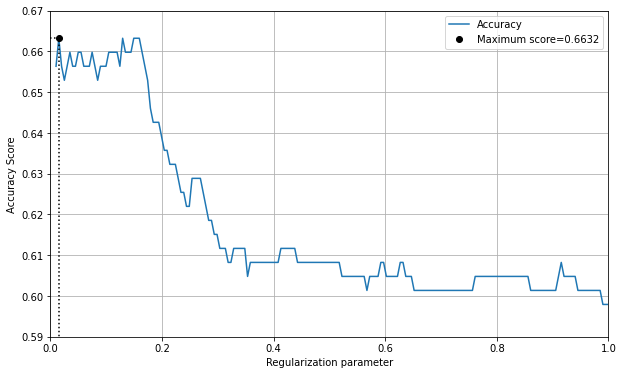

In [ ]:
argmax = np.argmax(reg_scores)
max_lambda = lambdas[argmax]
max_acc = reg_scores[argmax]
print(f"Regularization param at the maximum accuracy: {max_lambda:.5f}")

plt.figure(figsize=(10, 6))
plt.plot(lambdas, reg_scores, label=f"Accuracy")
plt.plot([max_lambda, max_lambda], [0, max_acc], 'k:')
plt.plot([0, max_lambda], [max_acc, max_acc], 'k:')
plt.plot(max_lambda, max_acc, 'ko', label=f"Maximum score={max_acc:.4f}")
plt.xlabel("Regularization parameter")
plt.ylabel("Accuracy Score")
plt.xlim([0, 1])
plt.ylim([0.59, 0.67])
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model = LogisticRegression(penalty='l1', random_state=RANDOM_STATE, C=max_lambda, solver='liblinear', multi_class='ovr')
model.fit(X_tr, y_tr)
coefs = np.mean(model.coef_, axis=0)
nonzeros = np.where(coefs != 0)[0]
print(nonzeros)
print(nonzeros.shape)

[  2  17  28  38  49  64  70  79  90 104 129 145 172 177 193 246]
(16,)


In [ ]:
# candidates = [lda, rbfsvm, bag, rf, gbc]

X_tr_mod = X_tr.iloc[:, nonzeros]
X_val_mod = X_val.iloc[:, nonzeros]
print(f"OVO, Hold-out")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for cand in models:
    ## using ovo function
    estimator_ovo = OneVsOneClassifier(cand).fit(X_tr_mod, y_tr)
    y_pred_ovo = estimator_ovo.predict(X_val_mod)
    accuracy_ovo = accuracy_score(y_val, y_pred_ovo)
    result = classification_report(y_val, y_pred_ovo).split('\n')[-2]
    f1 = float(result.split(' ')[-8])

    ## not using ovo function - to get the roc_auc_score
    estimator = cand.fit(X_tr_mod, y_tr)
    try:
        y_pred_proba = estimator.predict_proba(X_val_mod)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovo')
        print(f"\tModel: {cand.__class__.__name__!s:<40}\tAccuracy: {accuracy_ovo:.5f}\tROC-AUC:{roc_auc:.5f}\tF1:{f1}")
        score_df = score_df.append({'model': cand.__class__.__name__, 'acc': accuracy_ovo, 'roc-auc': roc_auc, 'f1': f1}, ignore_index=True)
    except:
        print(f"\tModel: {cand.__class__.__name__!s:<40}\tAccuracy: {accuracy_ovo:.5f}\tF1: {f1}")
        score_df = score_df.append({'model': cand.__class__.__name__, 'acc': accuracy_ovo, 'roc-auc': 0, 'f1': f1}, ignore_index=True)

scores['OVO_hL'] = score_df

OVO, Hold-out
	Model: LogisticRegression                      	Accuracy: 0.67010	ROC-AUC:0.77062	F1:0.62
	Model: KNeighborsClassifier                    	Accuracy: 0.61512	ROC-AUC:0.68074	F1:0.6
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.66323	ROC-AUC:0.75407	F1:0.62
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.58763	ROC-AUC:0.71389	F1:0.59
	Model: LinearSVC                               	Accuracy: 0.65979	F1: 0.59
	Model: SVC                                     	Accuracy: 0.63918	F1: 0.55
	Model: DecisionTreeClassifier                  	Accuracy: 0.49828	ROC-AUC:0.57230	F1:0.5
	Model: BaggingClassifier                       	Accuracy: 0.62199	ROC-AUC:0.70127	F1:0.59
	Model: RandomForestClassifier                  	Accuracy: 0.64261	ROC-AUC:0.73686	F1:0.6
	Model: GradientBoostingClassifier              	Accuracy: 0.67010	ROC-AUC:0.73122	F1:0.64


In [ ]:
# candidates = [lda, rbfsvm, bag, rf, gbc]

X_tr_mod = X_tr.iloc[:, nonzeros]
X_val_mod = X_val.iloc[:, nonzeros]
print(f"OVO, Hold-out")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for cand in models:
    ## using ovo function
    estimator_ovo = OneVsOneClassifier(cand).fit(X_tr_mod, y_tr)
    y_pred_ovo = estimator_ovo.predict(X_val_mod)
    accuracy_ovo = accuracy_score(y_val, y_pred_ovo)
    result = classification_report(y_val, y_pred_ovo).split('\n')[-2]
    f1 = float(result.split(' ')[-8])

    ## not using ovo function - to get the roc_auc_score
    estimator = cand.fit(X_tr_mod, y_tr)
    try:
        y_pred_proba = estimator.predict_proba(X_val_mod)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovo')
        print(f"\tModel: {cand.__class__.__name__!s:<40}\tAccuracy: {accuracy_ovo:.5f}\tROC-AUC:{roc_auc:.5f}\tF1:{f1}")
        score_df = score_df.append({'model': cand.__class__.__name__, 'acc': accuracy_ovo, 'roc-auc': roc_auc, 'f1': f1}, ignore_index=True)
    except:
        print(f"\tModel: {cand.__class__.__name__!s:<40}\tAccuracy: {accuracy_ovo:.5f}\tF1: {f1}")
        score_df = score_df.append({'model': cand.__class__.__name__, 'acc': accuracy_ovo, 'roc-auc': 0, 'f1': f1}, ignore_index=True)

scores['OVO_hL'] = score_df

OVO, Hold-out
	Model: LogisticRegression                      	Accuracy: 0.67010	ROC-AUC:0.77062	F1:0.62
	Model: KNeighborsClassifier                    	Accuracy: 0.61512	ROC-AUC:0.68074	F1:0.6
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.66323	ROC-AUC:0.75407	F1:0.62
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.58763	ROC-AUC:0.71389	F1:0.59
	Model: LinearSVC                               	Accuracy: 0.65979	F1: 0.59
	Model: SVC                                     	Accuracy: 0.63918	F1: 0.55
	Model: DecisionTreeClassifier                  	Accuracy: 0.49828	ROC-AUC:0.57230	F1:0.5
	Model: BaggingClassifier                       	Accuracy: 0.62199	ROC-AUC:0.70127	F1:0.59
	Model: RandomForestClassifier                  	Accuracy: 0.64261	ROC-AUC:0.73686	F1:0.6
	Model: GradientBoostingClassifier              	Accuracy: 0.67010	ROC-AUC:0.73122	F1:0.64


In [ ]:
X_train_mod = X_train.iloc[:, nonzeros]

print(f"OVO, CV")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for m in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    accs = []
    rocs = []
    f1s = []
    roc = True
    for train_idx, val_idx in kfold.split(X_train_mod, y_train):
        X_tr_cv, X_val_cv = X_train_mod.iloc[train_idx, :], X_train_mod.iloc[val_idx, :]
        y_tr_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        ##
        estimator_ovo = OneVsOneClassifier(m).fit(X_tr_cv, y_tr_cv)
        y_pred_ovo_cv = estimator_ovo.predict(X_val_cv)
        accuracy_ovo_cv = accuracy_score(y_val_cv, y_pred_ovo_cv)
        accs.append(accuracy_ovo_cv)
        result = classification_report(y_val_cv, y_pred_ovo_cv).split('\n')[-2]
        f1 = float(result.split(' ')[-8])
        f1s.append(f1)
        ##
        estimator = m.fit(X_tr_cv, y_tr_cv)
        try:
            y_pred_proba_cv = estimator.predict_proba(X_val_cv)
            roc_auc_cv = roc_auc_score(y_val_cv, y_pred_proba_cv, multi_class='ovo')
            rocs.append(roc_auc_cv)
        except:
            roc = False

    if roc:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tROC-AUC:{np.mean(rocs):.5f}\tF1:{np.mean(f1s):.5f}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': np.mean(rocs), 'f1': np.mean(f1s)}, ignore_index=True)
    else:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tF1: {np.mean(f1s):.5f}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': 0, 'f1': np.mean(f1s)}, ignore_index=True)

scores['OVO_cL'] = score_df

OVO, CV
	Model: LogisticRegression                      	Accuracy: 0.64944	ROC-AUC:0.76460	F1:0.60400
	Model: KNeighborsClassifier                    	Accuracy: 0.61499	ROC-AUC:0.67911	F1:0.59600
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.64254	ROC-AUC:0.75370	F1:0.60200
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.58191	ROC-AUC:0.69074	F1:0.58200
	Model: LinearSVC                               	Accuracy: 0.64943	F1: 0.59200
	Model: SVC                                     	Accuracy: 0.64462	F1: 0.58000
	Model: DecisionTreeClassifier                  	Accuracy: 0.51719	ROC-AUC:0.60232	F1:0.51800
	Model: BaggingClassifier                       	Accuracy: 0.63360	ROC-AUC:0.70624	F1:0.60000
	Model: RandomForestClassifier                  	Accuracy: 0.64391	ROC-AUC:0.73249	F1:0.61000
	Model: GradientBoostingClassifier              	Accuracy: 0.63290	ROC-AUC:0.73657	F1:0.60200


In [ ]:
print(f"OVR, Hold-out")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for m in models:
    estimator = OneVsRestClassifier(m).fit(X_tr_mod, y_tr)
    y_pred = estimator.predict(X_val_mod)
    accuracy = accuracy_score(y_val, y_pred)
    result = classification_report(y_val, y_pred).split('\n')[-2]
    f1 = float(result.split(' ')[-8])
    try:
        y_pred_proba = estimator.predict_proba(X_val_mod)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}\tROC-AUC: {roc_auc:.5f}\tF1: {f1}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': accuracy, 'roc-auc': roc_auc, 'f1': f1}, ignore_index=True)
    except:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}\tF1:{f1}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': accuracy, 'roc-auc': 0, 'f1':f1}, ignore_index=True)

scores['OVR_hL'] = score_df

OVR, Hold-out
	Model: LogisticRegression                      	Accuracy: 0.67354	ROC-AUC: 0.77990	F1: 0.61
	Model: KNeighborsClassifier                    	Accuracy: 0.58076	ROC-AUC: 0.69341	F1: 0.58
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.66667	ROC-AUC: 0.76819	F1: 0.6
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.60137	ROC-AUC: 0.71827	F1: 0.61
	Model: LinearSVC                               	Accuracy: 0.66667	F1:0.59
	Model: SVC                                     	Accuracy: 0.64948	F1:0.57
	Model: DecisionTreeClassifier                  	Accuracy: 0.48797	F1:0.49
	Model: BaggingClassifier                       	Accuracy: 0.59107	ROC-AUC: 0.70839	F1: 0.58
	Model: RandomForestClassifier                  	Accuracy: 0.62543	ROC-AUC: 0.74601	F1: 0.58
	Model: GradientBoostingClassifier              	Accuracy: 0.65292	ROC-AUC: 0.76128	F1: 0.61


In [ ]:
print(f"OVR, CV")
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for m in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    accs = []
    rocs = []
    f1s = []
    roc = True
    for train_idx, val_idx in kfold.split(X_train_mod, y_train):
        X_tr_cv, X_val_cv = X_train_mod.iloc[train_idx, :], X_train_mod.iloc[val_idx, :]
        y_tr_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
        estimator = OneVsRestClassifier(m).fit(X_tr_cv, y_tr_cv)
        y_pred = estimator.predict(X_val_cv)
        accuracy = accuracy_score(y_val_cv, y_pred)
        accs.append(accuracy)
        result = classification_report(y_val_cv, y_pred).split('\n')[-2]
        f1 = float(result.split(' ')[-8])
        f1s.append(f1)
        try:
            y_pred_proba = estimator.predict_proba(X_val_cv)
            roc_auc = roc_auc_score(y_val_cv, y_pred_proba, multi_class='ovr')
            rocs.append(roc_auc)
        except:
            roc = False
    
    if roc:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tROC-AUC: {np.mean(rocs):.5f}\tF1: {np.mean(f1s)}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': np.mean(rocs), 'f1': np.mean(f1s)}, ignore_index=True)
    else:
        print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {np.mean(accs):.5f}\tF1:{np.mean(f1s):.5f}")
        score_df = score_df.append({'model': m.__class__.__name__, 'acc': np.mean(accs), 'roc-auc': 0, 'f1': np.mean(f1s)}, ignore_index=True)

scores['OVR_cL'] = score_df

OVR, CV
	Model: LogisticRegression                      	Accuracy: 0.64874	ROC-AUC: 0.77385	F1: 0.582
	Model: KNeighborsClassifier                    	Accuracy: 0.60053	ROC-AUC: 0.69063	F1: 0.594
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.64599	ROC-AUC: 0.76664	F1: 0.5740000000000001
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.58398	ROC-AUC: 0.71115	F1: 0.5879999999999999
	Model: LinearSVC                               	Accuracy: 0.64944	F1:0.57800
	Model: SVC                                     	Accuracy: 0.64530	F1:0.57200
	Model: DecisionTreeClassifier                  	Accuracy: 0.48757	F1:0.49400
	Model: BaggingClassifier                       	Accuracy: 0.63081	ROC-AUC: 0.71888	F1: 0.616
	Model: RandomForestClassifier                  	Accuracy: 0.64528	ROC-AUC: 0.74503	F1: 0.61
	Model: GradientBoostingClassifier              	Accuracy: 0.63359	ROC-AUC: 0.75566	F1: 0.596


In [ ]:
## 
for item in scores:
    df = scores[item]
    df.dropna(inplace=True)
    scores[item] = df
    print(scores[item].shape)

(10, 4)
(10, 4)
(10, 4)
(10, 4)
(10, 4)
(10, 4)
(10, 4)
(10, 4)


### Stepwise Selection

* Here, I'll implement the stepwise selection only for the models other than tree-based models.

#### Forward Selection

In [ ]:
# best_params = dict()
# for m in models:
#     scores = []
#     supports = []
#     updates = 0
#     for i in range(1, X_tr.shape[1]+1, 5):
#         print(f"Selected features: {i}")
#         sfs = SequentialFeatureSelector(m, n_features_to_select=i, direction='forward')
#         sfs.fit(X_tr, y_tr)
#         supports.append(sfs.get_support(indices=True))
#         X_tr_mod = sfs.transform(X_tr)
#         X_val_mod = sfs.transform(X_val)
#         estimator = OneVsRestClassifier(m).fit(X_tr_mod, y_tr)
#         y_pred = estimator.predict(X_val_mod)
#         accuracy = accuracy_score(y_val, y_pred)
#         try:
#             y_pred_proba = estimator.predict_proba(X_val_mod)
#             roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
#             print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}\tROC-AUC: {roc_auc:.5f}")
#         except:
#             print(f"\tModel: {m.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}")
        
#         if len(scores) == 0:
#             prev_max = 0
#         else:
#             prev_max = np.max(scores)
#         scores.append(accuracy)
#         curr_max = np.max(scores)
#         if prev_max == curr_max:
#             updates += 1
#         else:
#             updates = 0 # re-initialize
        
#         ## early-stopping
#         if updates >= 3:
#             argmax = np.argmax(scores)
#             best_params[m] = supports[argmax]
#             print(f"{m.__class__.__name__} is done! Best number of feature is {5*argmax+1}")
#             break

#     if updates == 0:    
#         argmax = np.argmax(scores)
#         best_params[m] = supports[argmax]
#         print(f"{m.__class__.__name__} is done! Best number of feature is {5*argmax+1}")

In [ ]:
# best_params = dict()
# sfs_lr = SequentialFeatureSelector(lr, n_features_to_select=6, direction='forward')
# sfs_lr.fit(X_tr, y_tr)

# sfs_knn = SequentialFeatureSelector(knn, n_features_to_select=11, direction='forward')
# sfs_knn.fit(X_tr, y_tr)

# sfs_lda = SequentialFeatureSelector(lda, n_features_to_select=16, direction='forward')
# sfs_lda.fit(X_tr, y_tr)

# sfs_qda = SequentialFeatureSelector(qda, n_features_to_select=1, direction='forward')
# sfs_qda.fit(X_tr, y_tr)

# sfs_rbfsvm = SequentialFeatureSelector(rbfsvm, n_features_to_select=16, direction='forward')
# sfs_rbfsvm.fit(X_tr, y_tr)

# sfs_linsvc = SequentialFeatureSelector(linsvc, n_features_to_select=16, direction='forward')
# sfs_linsvc.fit(X_tr, y_tr)

# sfs_bag = SequentialFeatureSelector(bag, n_features_to_select=16, direction='forward')
# sfs_bag.fit(X_tr, y_tr)

# best_params[lr] = sfs_lr.get_support(indices=True)
# best_params[knn] = sfs_knn.get_support(indices=True)
# best_params[linsvc] = sfs_linsvc.get_support(indices=True)
# best_params[lda] = sfs_lda.get_support(indices=True)
# best_params[qda] = sfs_qda.get_support(indices=True)
# best_params[rbfsvm] = sfs_rbfsvm.get_support(indices=True)
# best_params[bag] = sfs_bag.get_support(indices=True)

In [ ]:
best_feats = dict()
best_feats[lr] = np.array([ 42, 128, 137, 177, 209, 224])
best_feats[knn] = np.array([  8,  59,  75,  80,  83,  94, 126, 149, 162, 177, 209])
best_feats[lda] = np.array([ 18,  21,  52,  54,  69,  72,  79,  82,  89,  92, 106, 126, 176, 186, 208, 214])
best_feats[linsvc] = np.array([  8,  15,  21,  37,  52,  72,  92, 106, 119, 122, 126, 135, 155, 161, 177, 221])
best_feats[qda] = np.array([79])
best_feats[rbfsvm] = np.array([  6,  10,  38,  61,  81,  82,  93, 101, 121, 152, 170, 177, 185, 188, 194, 239])
best_feats[bag] = np.array([8,  33,  53,  73, 107, 120, 126, 134, 165, 168, 177, 186, 204, 226, 230, 240])

### Feature Importance Selection

* For tree-based model, the `scikit-learn` supports the feature importance, which shows how much each variable contributed to decrease in the loss function. So let me select the features based on that procedure.

In [ ]:
trees = [dt, rf, gbc]
for tree in trees:
    imp = pd.DataFrame(index=X_tr.columns.values)
    estimator = tree.fit(X_tr, y_tr)
    print(f"Model: {tree.__class__.__name__!s:<40}")
    imp["importance"] = estimator.feature_importances_
    imp.sort_values(by="importance", ascending=False, inplace=True)
    # print(imp.head(20))
    toptwenty = imp.head(20)
    print(f"\t{toptwenty.index}\nImportance sum: {toptwenty.sum()}")
    best_feats[tree] = toptwenty.index.values

Model: DecisionTreeClassifier                  
	Int64Index([177, 219,  33,  28, 249, 131, 118, 187,  71,  48,  41, 243, 157,
            201, 111, 221, 225, 197,  67, 211],
           dtype='int64')
Importance sum: importance    0.469503
dtype: float64
Model: RandomForestClassifier                  
	Int64Index([177,  79, 208, 225, 137,  28, 239, 126,  83, 149,  38,  90,  17,
            118, 186, 219,  64, 224, 246,  82],
           dtype='int64')
Importance sum: importance    0.201781
dtype: float64
Model: GradientBoostingClassifier              
	Int64Index([177,  28,  79, 219,  17, 208,  90, 149,   2, 129, 140, 172, 134,
             38,  61,  64, 190, 125, 199, 118],
           dtype='int64')
Importance sum: importance    0.439446
dtype: float64


### Validation

#### OVO

In [ ]:
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])
for model in best_feats.keys():
    feats = best_feats[model]
    X_tr_mod, X_val_mod = X_tr.iloc[:, feats], X_val.iloc[:, feats]
    estimator = OneVsOneClassifier(model).fit(X_tr_mod, y_tr)
    y_pred = estimator.predict(X_val_mod)
    result = classification_report(y_val, y_pred).split('\n')[-2]
    f1 = float(result.split(' ')[-8])
    print(f"Mode: {model.__class__.__name__!s:<40}\tAccuracy: {accuracy_score(y_val, y_pred):.5f}\tF1:{f1}")
    score_df = score_df.append({'model': model.__class__.__name__, 'acc': accuracy_score(y_val, y_pred), 'roc-auc': 0, 'f1': f1}, ignore_index=True)

scores['OVO_hS'] = score_df

Mode: LogisticRegression                      	Accuracy: 0.65292	F1:0.57
Mode: KNeighborsClassifier                    	Accuracy: 0.63918	F1:0.62
Mode: LinearDiscriminantAnalysis              	Accuracy: 0.64261	F1:0.57
Mode: LinearSVC                               	Accuracy: 0.64948	F1:0.58
Mode: QuadraticDiscriminantAnalysis           	Accuracy: 0.61512	F1:0.53
Mode: SVC                                     	Accuracy: 0.63230	F1:0.55
Mode: BaggingClassifier                       	Accuracy: 0.62887	F1:0.58
Mode: DecisionTreeClassifier                  	Accuracy: 0.53265	F1:0.53
Mode: RandomForestClassifier                  	Accuracy: 0.63230	F1:0.58
Mode: GradientBoostingClassifier              	Accuracy: 0.65636	F1:0.62


#### OVR

In [ ]:
score_df = pd.DataFrame(columns=['model', 'acc', 'roc-auc', 'f1'])

for model in best_feats.keys():
    feats = best_feats[model]
    X_tr_mod, X_val_mod = X_tr.iloc[:, feats], X_val.iloc[:, feats]
    estimator = OneVsRestClassifier(model).fit(X_tr_mod, y_tr)
    y_pred = estimator.predict(X_val_mod)
    accuracy = accuracy_score(y_val, y_pred)
    result = classification_report(y_val, y_pred).split('\n')[-2]
    f1 = float(result.split(' ')[-8])
    try:
        y_pred_proba = estimator.predict_proba(X_val_mod)
        roc_auc = roc_auc_score(y_val, y_pred_proba, multi_class='ovr')
        print(f"\tModel: {model.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}\tROC-AUC: {roc_auc:.5f}\tF1: {f1}")
        score_df = score_df.append({'model': model.__class__.__name__, 'acc': accuracy, 'roc-auc': roc_auc, 'f1': f1}, ignore_index=True)
    except:
        print(f"\tModel: {model.__class__.__name__!s:<40}\tAccuracy: {accuracy:.5f}\tF1: {f1}")
        score_df = score_df.append({'model': model.__class__.__name__, 'acc': accuracy, 'roc-auc': 0, 'f1': f1}, ignore_index=True)

scores['OVR_hS'] = score_df

	Model: LogisticRegression                      	Accuracy: 0.65292	ROC-AUC: 0.72528	F1: 0.57
	Model: KNeighborsClassifier                    	Accuracy: 0.61856	ROC-AUC: 0.70655	F1: 0.61
	Model: LinearDiscriminantAnalysis              	Accuracy: 0.63918	ROC-AUC: 0.69919	F1: 0.56
	Model: LinearSVC                               	Accuracy: 0.65636	F1: 0.58
	Model: QuadraticDiscriminantAnalysis           	Accuracy: 0.61856	ROC-AUC: 0.71171	F1: 0.53
	Model: SVC                                     	Accuracy: 0.64948	F1: 0.58
	Model: BaggingClassifier                       	Accuracy: 0.61168	ROC-AUC: 0.66461	F1: 0.59
	Model: DecisionTreeClassifier                  	Accuracy: 0.46392	F1: 0.47
	Model: RandomForestClassifier                  	Accuracy: 0.63918	ROC-AUC: 0.73886	F1: 0.6
	Model: GradientBoostingClassifier              	Accuracy: 0.65292	ROC-AUC: 0.74935	F1: 0.61


In [ ]:
scores['OVR_hS']

,model,acc,roc-auc,f1
0,LogisticRegression,0.652921,0.725275,0.57
1,KNeighborsClassifier,0.618557,0.706552,0.61
2,LinearDiscriminantAnalysis,0.639175,0.699191,0.56
3,LinearSVC,0.656357,0.000000,0.58
4,QuadraticDiscriminantAnalysis,0.618557,0.711710,0.53
5,SVC,0.649485,0.000000,0.58
6,BaggingClassifier,0.611684,0.664613,0.59
7,DecisionTreeClassifier,0.463918,0.000000,0.47
8,RandomForestClassifier,0.639175,0.738864,0.60
9,GradientBoostingClassifier,0.652921,0.749348,0.61


In [ ]:
acc_comparison = pd.DataFrame({'model': scores['OVR_hS']["model"]})
for key in scores.keys():
    df = scores[key].iloc[:, :2]
    acc_comparison = pd.merge(acc_comparison, df, on="model", how="inner")

acc_comparison.columns = ["model"] + list(scores.keys())
acc_comparison.index = acc_comparison["model"]
acc_comparison.drop(["model"], axis=1, inplace=True)
acc_comparison

,OVO_h,OVO_c,OVR_h,OVR_c,OVO_hL,OVO_cL,OVR_hL,OVR_cL,OVO_hS,OVR_hS
model,,,,,,,,,,
LogisticRegression,0.532646,0.519251,0.546392,0.530942,0.670103,0.649437,0.673540,0.648743,0.652921,0.652921
KNeighborsClassifier,0.577320,0.517182,0.484536,0.469665,0.615120,0.614990,0.580756,0.600531,0.639175,0.618557
LinearDiscriminantAnalysis,0.591065,0.543372,0.587629,0.556457,0.663230,0.642543,0.666667,0.645991,0.642612,0.639175
LinearSVC,0.532646,0.520621,0.542955,0.517168,0.659794,0.649435,0.666667,0.649437,0.649485,0.656357
QuadraticDiscriminantAnalysis,0.553265,0.555085,0.556701,0.547510,0.587629,0.581910,0.601375,0.583979,0.615120,0.618557
SVC,0.635739,0.643237,0.649485,0.641168,0.639175,0.644621,0.649485,0.645302,0.632302,0.649485
BaggingClassifier,0.646048,0.615691,0.615120,0.616381,0.621993,0.633599,0.591065,0.630812,0.628866,0.611684
DecisionTreeClassifier,0.536082,0.531677,0.453608,0.453824,0.498282,0.517192,0.487973,0.487567,0.532646,0.463918
RandomForestClassifier,0.639175,0.642541,0.639175,0.634262,0.642612,0.643910,0.625430,0.645278,0.632302,0.639175


In [ ]:
roc_comparison = pd.DataFrame({'model': scores['OVR_hS']["model"]})
for key in scores.keys():
    df = scores[key].iloc[:, 2]
    roc_comparison = pd.concat([roc_comparison, df], axis=1)

roc_comparison.columns = ["model"] + list(scores.keys())
roc_comparison.index = roc_comparison["model"]
roc_comparison.drop(["model"], axis=1, inplace=True)
roc_comparison

,OVO_h,OVO_c,OVR_h,OVR_c,OVO_hL,OVO_cL,OVR_hL,OVR_cL,OVO_hS,OVR_hS
model,,,,,,,,,,
LogisticRegression,0.672275,0.638416,0.683462,0.656168,0.770619,0.764602,0.779897,0.773851,0,0.725275
KNeighborsClassifier,0.641521,0.635645,0.647331,0.638833,0.680744,0.679109,0.693413,0.690632,0,0.706552
LinearDiscriminantAnalysis,0.702931,0.669385,0.709163,0.678192,0.754073,0.753704,0.768187,0.766642,0,0.699191
LinearSVC,0.528684,0.526592,0.545506,0.539771,0.713886,0.690739,0.718271,0.711147,0,0.000000
QuadraticDiscriminantAnalysis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.711710
SVC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000
BaggingClassifier,0.591464,0.598853,0.000000,0.000000,0.572300,0.602317,0.000000,0.000000,0,0.664613
DecisionTreeClassifier,0.709319,0.668342,0.695387,0.695472,0.701271,0.706244,0.708390,0.718882,0,0.000000
RandomForestClassifier,0.723181,0.707879,0.735470,0.723558,0.736856,0.732491,0.746005,0.745028,0,0.738864


In [ ]:
f1_comparison = pd.DataFrame({'model': scores['OVR_hS']["model"]})
for key in scores.keys():
    df = scores[key].iloc[:, 3]
    f1_comparison = pd.concat([f1_comparison, df], axis=1)

f1_comparison.columns = ["model"] + list(scores.keys())
f1_comparison.index = f1_comparison["model"]
f1_comparison.drop(["model"], axis=1, inplace=True)
f1_comparison

,OVO_h,OVO_c,OVR_h,OVR_c,OVO_hL,OVO_cL,OVR_hL,OVR_cL,OVO_hS,OVR_hS
model,,,,,,,,,,
LogisticRegression,0.54,0.526,0.55,0.522,0.62,0.604,0.61,0.582,0.57,0.57
KNeighborsClassifier,0.58,0.530,0.50,0.482,0.60,0.596,0.58,0.594,0.62,0.61
LinearDiscriminantAnalysis,0.58,0.538,0.56,0.534,0.62,0.602,0.60,0.574,0.57,0.56
LinearSVC,0.47,0.468,0.47,0.470,0.59,0.582,0.61,0.588,0.58,0.58
QuadraticDiscriminantAnalysis,0.54,0.528,0.54,0.508,0.59,0.592,0.59,0.578,0.53,0.53
SVC,0.55,0.582,0.57,0.566,0.55,0.580,0.57,0.572,0.55,0.58
BaggingClassifier,0.53,0.534,0.46,0.466,0.50,0.518,0.49,0.494,0.58,0.59
DecisionTreeClassifier,0.61,0.574,0.58,0.584,0.59,0.600,0.58,0.616,0.53,0.47
RandomForestClassifier,0.57,0.590,0.59,0.582,0.60,0.610,0.58,0.610,0.58,0.60


In [ ]:
roc_argmax_col = np.argmax(roc_comparison.max())
roc_argmax_idx = np.argmax(roc_comparison.iloc[:, roc_argmax_col])

acc_argmax_col = np.argmax(acc_comparison.max())
acc_argmax_idx = np.argmax(acc_comparison.iloc[:, acc_argmax_col])

f1_argmax_col = np.argmax(f1_comparison.max())
f1_argmax_idx = np.argmax(f1_comparison.iloc[:, f1_argmax_col])

print(f"Best model in terms of accuracy: {acc_comparison.index[acc_argmax_idx]:<40}\tMethod: {acc_comparison.columns.values[acc_argmax_col]}")
print(f"Best model in terms of roc-auc: {roc_comparison.index[roc_argmax_idx]:<40}\tMethod: {roc_comparison.columns.values[roc_argmax_col]}")
print(f"Best model in terms of f1: {f1_comparison.index[f1_argmax_idx]:<40}\tMethod: {f1_comparison.columns.values[f1_argmax_col]}")

Best model in terms of accuracy: LogisticRegression                      	Method: OVR_hL
Best model in terms of roc-auc: LogisticRegression                      	Method: OVR_hL
Best model in terms of f1: GradientBoostingClassifier              	Method: OVO_hL


# Model optimization

* From the baseline, two models were selected:
    - Logisitic regression under OVR method, hold-out validation, and with the features selected by shrinkage in terms of Accuracy and ROC-AUC: 0.6735, 0.7798, respectively.
    - Gradient Boosting Tree under OVO method, hold-out validation, and with the features selected by shrinkage in terms of f1: 0.64

* I'll go through the hyper-parameter tuning with the tree-based models and the best candidates.
    - Candidates
        - Logistic regression
        - LDA
        - Bagging
        - Random Forest
        - Boosting


In [ ]:
shrink_feats = nonzeros
shrink_feats

array([  2,  17,  28,  38,  49,  64,  70,  79,  90, 104, 129, 145, 172,
       177, 193, 246])

## Hyper-parameter Tuning using CV

In [ ]:
def f1_multi(y_true, y_pred):
    conf = confusion_matrix(y_true, y_pred)
    classes = np.unique(y_true).shape[0]
    f1s = []
    for i in range(classes):
        c = np.sort(np.unique(y_true))[i]
        portion = np.where(y_true == c)[0].shape[0] / y_true.shape[0]
        tp = conf[i, i]
        fp = np.sum(conf, axis=0)[i] - tp
        fn = np.sum(conf, axis=1)[i] - tp
        tn = np.sum(conf) - tp - fn - fp

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2*precision*recall) / (precision+recall)
        f1s.append(f1*portion)
    return np.sum(f1s)

f1_custom = make_scorer(f1_multi)

In [ ]:
def roc_multi_ovr(y_true, y_pred):
    return roc_auc_score(y_true, y_pred, multi_class='ovr')

def roc_multi_ovo(y_true, y_pred):
    return roc_auc_score(y_true, y_pred, multi_class='ovo')

roc_ovr = make_scorer(roc_multi_ovr, needs_proba=True)
roc_ovo = make_scorer(roc_multi_ovo, needs_proba=True)

### With selected features

In [ ]:
X_train_mod = X_train.iloc[:, shrink_feats]
X_tr_mod = X_tr.iloc[:, shrink_feats]
X_val_mod = X_val.iloc[:, shrink_feats]

In [ ]:
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

#### Logistic regression

In [ ]:
lr = LogisticRegression(solver='saga', C=max_lambda, random_state=RANDOM_STATE)

param_grid = {
    'penalty': ['none', 'l1'],
    'max_iter': [1, 2, 5, 10, 20, 50, 100, 200, 500],
    'multi_class': ['ovr', 'multinomial']
}

In [ ]:
## accuracy
lr_acc = GridSearchCV(lr, param_grid=param_grid, scoring='accuracy', cv=fold, n_jobs=-1)
lr_acc.fit(X_train_mod, y_train)
print(f"Best score: {lr_acc.best_score_:.5f}\tBest model: {lr_acc.best_params_}")

Best score: 0.65221	Best model: {'max_iter': 20, 'multi_class': 'multinomial', 'penalty': 'none'}


In [ ]:
# ## OVO
# lr_ovo = GridSearchCV(lr, param_grid=param_grid, scoring=roc_ovo, cv=fold, n_jobs=-1)
# lr_ovo.fit(X_train_mod, y_train)
# print(f"Best score: {lr_ovo.best_score_:.5f}\tBest model: {lr_ovo.best_params_}")

In [ ]:
## OVR
lr_ovr = GridSearchCV(lr, param_grid=param_grid, scoring=roc_ovr, cv=fold, n_jobs=-1)
lr_ovr.fit(X_train_mod, y_train)
print(f"Best score: {lr_ovr.best_score_:.5f}\tBest model: {lr_ovr.best_params_}")

Best score: 0.78199	Best model: {'max_iter': 10, 'multi_class': 'multinomial', 'penalty': 'none'}


In [ ]:
## F1
lr_f1 = GridSearchCV(lr, param_grid=param_grid, scoring=f1_custom, cv=fold, n_jobs=-1)
lr_f1.fit(X_train_mod, y_train)
print(f"Best score: {lr_f1.best_score_:.5f}\tBest model: {lr_f1.best_params_}")

Best score: 0.60836	Best model: {'max_iter': 20, 'multi_class': 'multinomial', 'penalty': 'none'}


#### LDA

In [ ]:
lda = LDA()

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['none', 'auto', max_lambda, 0.5, 0.53, 0.55, 0.57, 0.6, 0.63, 0.65],
    'n_components': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

In [ ]:
## accuracy
lda_acc = GridSearchCV(lda, param_grid=param_grid, scoring='accuracy', cv=fold, n_jobs=-1)
lda_acc.fit(X_train_mod, y_train)
print(f"Best score: {lda_acc.best_score_:.5f}\tBest model: {lda_acc.best_params_}")

Best score: 0.64598	Best model: {'n_components': None, 'shrinkage': 0.6, 'solver': 'lsqr'}


In [ ]:
# ## OVO
# lda_ovo = GridSearchCV(lda, param_grid=param_grid, scoring=roc_ovo, cv=fold, n_jobs=-1)
# lda_ovo.fit(X_train_mod, y_train)
# print(f"Best score: {lda_ovo.best_score_:.5f}\tBest model: {lda_ovo.best_params_}")

In [ ]:
## OVR
lda_ovr = GridSearchCV(lda, param_grid=param_grid, scoring=roc_ovr, cv=fold, n_jobs=-1)
lda_ovr.fit(X_train_mod, y_train)
print(f"Best score: {lda_ovr.best_score_:.5f}\tBest model: {lda_ovr.best_params_}")

Best score: 0.77674	Best model: {'n_components': None, 'shrinkage': 0.55, 'solver': 'lsqr'}


In [ ]:
# F1
lda_f1 = GridSearchCV(lda, param_grid=param_grid, scoring=f1_custom, cv=fold, n_jobs=-1)
lda_f1.fit(X_train_mod, y_train)
print(f"Best score: {lda_f1.best_score_:.5f}\tBest model: {lda_f1.best_params_}")

Best score: 0.62789	Best model: {'n_components': None, 'shrinkage': 0.63, 'solver': 'lsqr'}


#### Bagging

In [ ]:
bag = BaggingClassifier(random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'max_features': [0.25, 0.4, 0.5]
}

In [ ]:
## accuracy
bag_acc = GridSearchCV(bag, param_grid=param_grid, scoring='accuracy', cv=fold, n_jobs=-1)
bag_acc.fit(X_train_mod, y_train)
print(f"Best score: {bag_acc.best_score_:.5f}\tBest model: {bag_acc.best_params_}")

Best score: 0.64460	Best model: {'max_features': 0.4, 'n_estimators': 25}


In [ ]:
# ## OVO
# bag_ovo = GridSearchCV(bag, param_grid=param_grid, scoring=roc_ovo, cv=fold, n_jobs=-1)
# bag_ovo.fit(X_train_mod, y_train)
# print(f"Best score: {bag_ovo.best_score_:.5f}\tBest model: {bag_ovo.best_params_}")

In [ ]:
## OVR
bag_ovr = GridSearchCV(bag, param_grid=param_grid, scoring=roc_ovr, cv=fold, n_jobs=-1)
bag_ovr.fit(X_train_mod, y_train)
print(f"Best score: {bag_ovr.best_score_:.5f}\tBest model: {bag_ovr.best_params_}")

Best score: 0.75644	Best model: {'max_features': 0.5, 'n_estimators': 100}


In [ ]:
## F1
bag_f1 = GridSearchCV(bag, param_grid=param_grid, scoring=f1_custom, cv=fold, n_jobs=-1)
bag_f1.fit(X_train_mod, y_train)
print(f"Best score: {bag_f1.best_score_:.5f}\tBest model: {bag_f1.best_params_}")

Best score: 0.60602	Best model: {'max_features': 0.4, 'n_estimators': 25}


#### Random Forest

In [ ]:
rf = RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [300, 2000, 2500],
    'max_depth': [3, 5]
}

In [ ]:
## accuracy
rf_acc = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv=fold, n_jobs=-1)
rf_acc.fit(X_train_mod, y_train)
print(f"Best score: {rf_acc.best_score_:.5f}\tBest model: {rf_acc.best_params_}")

Best score: 0.65220	Best model: {'max_depth': 3, 'n_estimators': 300}


In [ ]:
# ## OVO
# rf_ovo = GridSearchCV(rf, param_grid=param_grid, scoring=roc_ovo, cv=fold, n_jobs=-1)
# rf_ovo.fit(X_train_mod, y_train)
# print(f"Best score: {rf_ovo.best_score_:.5f}\tBest model: {rf_ovo.best_params_}")

In [ ]:
## OVR
rf_ovr = GridSearchCV(rf, param_grid=param_grid, scoring=roc_ovr, cv=fold, n_jobs=-1)
rf_ovr.fit(X_train_mod, y_train)
print(f"Best score: {rf_ovr.best_score_:.5f}\tBest model: {rf_ovr.best_params_}")

Best score: 0.76918	Best model: {'max_depth': 5, 'n_estimators': 2500}


In [ ]:
## F1
rf_f1 = GridSearchCV(rf, param_grid=param_grid, scoring=f1_custom, cv=fold, n_jobs=-1)
rf_f1.fit(X_train_mod, y_train)
print(f"Best score: {rf_f1.best_score_:.5f}\tBest model: {rf_f1.best_params_}")

Best score: nan	Best model: {'max_depth': 3, 'n_estimators': 300}


#### Boosting

In [ ]:
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [10, 20, 30, 50],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [1, 3, 5]
}

In [ ]:
## accuracy
gbc_acc = GridSearchCV(gbc, param_grid=param_grid, scoring='accuracy', cv=fold, n_jobs=-1)
gbc_acc.fit(X_train_mod, y_train)
print(f"Best score: {gbc_acc.best_score_:.5f}\tBest model: {gbc_acc.best_params_}")

Best score: 0.65425	Best model: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 30}


In [ ]:
# ## OVO
# gbc_ovo = GridSearchCV(gbc, param_grid=param_grid, scoring=roc_ovo, cv=fold, n_jobs=-1)
# gbc_ovo.fit(X_train_mod, y_train)
# print(f"Best score: {gbc_ovo.best_score_:.5f}\tBest model: {gbc_ovo.best_params_}")

In [ ]:
## OVR
gbc_ovr = GridSearchCV(gbc, param_grid=param_grid, scoring=roc_ovr, cv=fold, n_jobs=-1)
gbc_ovr.fit(X_train_mod, y_train)
print(f"Best score: {gbc_ovr.best_score_:.5f}\tBest model: {gbc_ovr.best_params_}")

Best score: 0.77275	Best model: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 10}


In [ ]:
## F1
gbc_f1 = GridSearchCV(gbc, param_grid=param_grid, scoring=f1_custom, cv=fold, n_jobs=-1)
gbc_f1.fit(X_train_mod, y_train)
print(f"Best score: {gbc_f1.best_score_:.5f}\tBest model: {gbc_f1.best_params_}")

Best score: 0.61085	Best model: {'learning_rate': 0.15, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 30}


### Selection after Tuning - for Tree-based

#### Random Forest

In [ ]:
rf = RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [300, 500, 1000, 2000],
    'max_depth': [3, 4, 5]
}

In [ ]:
## accuracy
rf_acc_before = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv=fold, n_jobs=-1)
rf_acc_before.fit(X_train, y_train)
print(f"Best score: {rf_acc_before.best_score_:.5f}\tBest model: {rf_acc_before.best_params_}")

Best score: 0.64256	Best model: {'max_depth': 3, 'n_estimators': 300}


In [ ]:
## OVR
rf_ovr_before = GridSearchCV(rf, param_grid=param_grid, scoring=roc_ovr, cv=fold, n_jobs=-1)
rf_ovr_before.fit(X_train, y_train)
print(f"Best score: {rf_ovr_before.best_score_:.5f}\tBest model: {rf_ovr_before.best_params_}")

Best score: 0.75077	Best model: {'max_depth': 4, 'n_estimators': 2000}


In [ ]:
## feature selection using feature importance
rf_best_params = rf_ovr_before.best_params_
rf_best = RandomForestClassifier(**rf_best_params, random_state=RANDOM_STATE)
rf_best.fit(X_train, y_train)

imp = pd.DataFrame(columns=['imp'])
imp['imp'] = rf_best.feature_importances_
imp.sort_values(by='imp', ascending=False, inplace=True)
print(imp.head(20).index.values)

imp_feats = imp.head(20).index.values
X_tr_rf = X_tr.iloc[:, imp_feats]
X_val_rf = X_val.iloc[:, imp_feats]
new_rf = RandomForestClassifier(**rf_best_params, random_state=RANDOM_STATE)
new_rf.fit(X_tr_rf, y_tr)
y_val_pred = new_rf.predict(X_val_rf)
y_val_proba = new_rf.predict_proba(X_val_rf)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}\tROC-AUC: {roc_auc_score(y_val, y_val_proba, multi_class='ovr')}")

[177  79  28 137 239 225  90 126  17 208 122  83 219 188  44  38 220 106
 120  82]
Accuracy: 0.6426116838487973	ROC-AUC: 0.7547890435691821


In [ ]:
## feature selection using feature importance
rf_best_params = rf_acc_before.best_params_
rf_best = RandomForestClassifier(**rf_best_params, random_state=RANDOM_STATE)
rf_best.fit(X_train, y_train)

imp = pd.DataFrame(columns=['imp'])
imp['imp'] = rf_best.feature_importances_
imp.sort_values(by='imp', ascending=False, inplace=True)
print(imp.head(20).index.values)

imp_feats = imp.head(20).index.values
X_tr_rf = X_tr.iloc[:, imp_feats]
X_val_rf = X_val.iloc[:, imp_feats]
new_rf = RandomForestClassifier(**rf_best_params, random_state=RANDOM_STATE)
new_rf.fit(X_tr_rf, y_tr)
y_val_pred = new_rf.predict(X_val_rf)
y_val_proba = new_rf.predict_proba(X_val_rf)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}\tROC-AUC: {roc_auc_score(y_val, y_val_proba, multi_class='ovr')}")

[177  79 137 225 239  28  90 126 208 188  83 219 122 106  17  44  82 224
 220 209]
Accuracy: 0.6426116838487973	ROC-AUC: 0.7532817709391275


#### Boosting

In [ ]:
gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [10, 20, 30, 50],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5],
    'max_features': ["sqrt", "log2"],
    'min_samples_leaf': [1, 3, 5]
}

In [ ]:
## accuracy
gbc_acc_before = GridSearchCV(gbc, param_grid=param_grid, scoring='accuracy', cv=fold, n_jobs=-1)
gbc_acc_before.fit(X_train, y_train)
print(f"Best score: {gbc_acc_before.best_score_:.5f}\tBest model: {gbc_acc_before.best_params_}")

Best score: 0.64876	Best model: {'learning_rate': 0.15, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 10}


In [ ]:
## OVR
gbc_ovr_before = GridSearchCV(gbc, param_grid=param_grid, scoring=roc_ovr, cv=fold, n_jobs=-1)
gbc_ovr_before.fit(X_train, y_train)
print(f"Best score: {gbc_ovr_before.best_score_:.5f}\tBest model: {gbc_ovr_before.best_params_}")

Best score: 0.75560	Best model: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 30}


In [ ]:
gbc_best_params = gbc_ovr_before.best_params_
gbc_best = GradientBoostingClassifier(**gbc_best_params, random_state=RANDOM_STATE)
gbc_best.fit(X_train, y_train)

imp = pd.DataFrame(columns=['imp'])
imp['imp'] = gbc_best.feature_importances_
imp.sort_values(by='imp', ascending=False, inplace=True)
print(imp.head(20).index.values)

imp_feats = imp.head(20).index.values
X_tr_gbc = X_tr.iloc[:, imp_feats]
X_val_gbc = X_val.iloc[:, imp_feats]
new_gbc = GradientBoostingClassifier(**gbc_best_params, random_state=RANDOM_STATE)
new_gbc.fit(X_tr_rf, y_tr)
y_val_pred = new_gbc.predict(X_val_rf)
y_val_proba = new_gbc.predict_proba(X_val_rf)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}\tROC-AUC: {roc_auc_score(y_val, y_val_proba, multi_class='ovr')}")

[177  28 208  27  83  90 239 106 126 220  79  44 224  17 188  31 137 149
 230  70]
Accuracy: 0.6391752577319587	ROC-AUC: 0.7546479087578793


In [ ]:
gbc_best_params = gbc_acc_before.best_params_
gbc_best = GradientBoostingClassifier(**gbc_best_params, random_state=RANDOM_STATE)
gbc_best.fit(X_train, y_train)

imp = pd.DataFrame(columns=['imp'])
imp['imp'] = gbc_best.feature_importances_
imp.sort_values(by='imp', ascending=False, inplace=True)
print(imp.head(20).index.values)

imp_feats = imp.head(20).index.values
X_tr_gbc = X_tr.iloc[:, imp_feats]
X_val_gbc = X_val.iloc[:, imp_feats]
new_gbc = GradientBoostingClassifier(**gbc_best_params, random_state=RANDOM_STATE)
new_gbc.fit(X_tr_rf, y_tr)
y_val_pred = new_gbc.predict(X_val_rf)
y_val_proba = new_gbc.predict_proba(X_val_rf)
print(f"Accuracy: {accuracy_score(y_val, y_val_pred)}\tROC-AUC: {roc_auc_score(y_val, y_val_proba, multi_class='ovr')}")

[ 27  90  28  43  83  22 224  64  79 209 104 177 135 126  17 118  37 128
 186  70]
Accuracy: 0.6357388316151202	ROC-AUC: 0.7435330476649008


# Best Model Selection

* In terms of accuracy, the Gradient boosting classifier is the best-performing model, while the Logistic regression is the best in terms of roc-auc.

* For overall cases, it can be seen that each model performs better when tuned after variable selection than before selection. So let's compare the performance of the final candidates, with the selected features from regularization.


In [ ]:
lr_tuned = LogisticRegression(**lr_ovr.best_params_, random_state=RANDOM_STATE)
gbc_tuned = GradientBoostingClassifier(**gbc_acc.best_params_, random_state=RANDOM_STATE)

In [ ]:
X_tr_mod = X_tr.iloc[:, shrink_feats]
X_val_mod = X_val.iloc[:, shrink_feats]

In [ ]:
final_cand = [lr_tuned, gbc_tuned]
for i in range(len(final_cand)):
    model = final_cand[i]
    estimator = model.fit(X_tr_mod, y_tr)
    y_pred = estimator.predict(X_val_mod)
    y_proba = estimator.predict_proba(X_val_mod)
    accuracy = accuracy_score(y_val, y_pred)
    roc = roc_auc_score(y_val, y_proba, multi_class='ovr')
    if i < 2:
        name = model.__class__.__name__ + "_untuned"
    else:
        name = model.__class__.__name__ + "_tuned"
    print(f"Model: {name}\tAccuracy: {accuracy:.5f}\tROC-AUC: {roc:.5f}")

Model: LogisticRegression_untuned	Accuracy: 0.67698	ROC-AUC: 0.78688
Model: GradientBoostingClassifier_untuned	Accuracy: 0.64605	ROC-AUC: 0.75580


* So the best model is Logistic regression, with the features selected from regularization.

# Test

In [ ]:
X_test.shape

(300, 251)

In [ ]:
X_test_mod = X_test.iloc[:, shrink_feats]

In [132]:
best_model = LogisticRegression(**lr_ovr.best_params_, random_state=RANDOM_STATE)
# best_model = LogisticRegression(penalty='none', random_state=RANDOM_STATE)

In [133]:
X_train_mod = X_train.iloc[:, shrink_feats]
best_model.fit(X_train_mod, y_train)

LogisticRegression(max_iter=10, multi_class='multinomial', penalty='none',
                   random_state=202224790)

In [134]:
y_pred = best_model.predict(X_test_mod)

In [135]:
y_pred[:20]

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2],
      dtype=uint8)

In [136]:
y_result = pd.DataFrame(columns=[0, 1, 2])
classes = [0, 1, 2]
for c in classes:
    y_result[c] = (y_pred == c).astype(np.uint8)

In [137]:
y_result.head(20)

,0,1,2
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [138]:
y_result[:].sum()

0    217
1     10
2     73
dtype: int64

In [ ]:
y_result.to_csv(PATH+"/2022-24790_pred.csv", index=False)